<a href="https://colab.research.google.com/github/shivani-202/Biomedical-Document-Classification/blob/main/dataset02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/balanced_dataset.csv')
df.head()

,statement,status,word_count
0,Is this health anxiety? 1) checking temperatur...,Anxiety,30
1,Is there any way to sleep better? I can't slee...,Anxiety,17
2,Lamictal ? Anyone with good reviews about lami...,Anxiety,8
3,Has anyone tried EMDR therapy? I just started....,Anxiety,31
4,would my may2018 ECG of picked this up? worrie...,Anxiety,273


In [29]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   statement   12200 non-null  object
 1   status      12200 non-null  object
 2   word_count  12200 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 286.1+ KB


(None,
          word_count
 count  12200.000000
 mean     117.559918
 std      161.079818
 min        1.000000
 25%       17.000000
 50%       66.000000
 75%      158.000000
 max     4239.000000)

In [30]:
#filling missing text columns with an empty string
df.fillna('', inplace=True)

In [31]:
#checking for missing or empty values
df.isnull().sum()

,0
statement,0
status,0
word_count,0


In [33]:
#check the distribution of categories in a column
print(df['status'].value_counts())

status
Depression    3500
Normal        3200
Anxiety       3000
Suicidal      2500
Name: count, dtype: int64


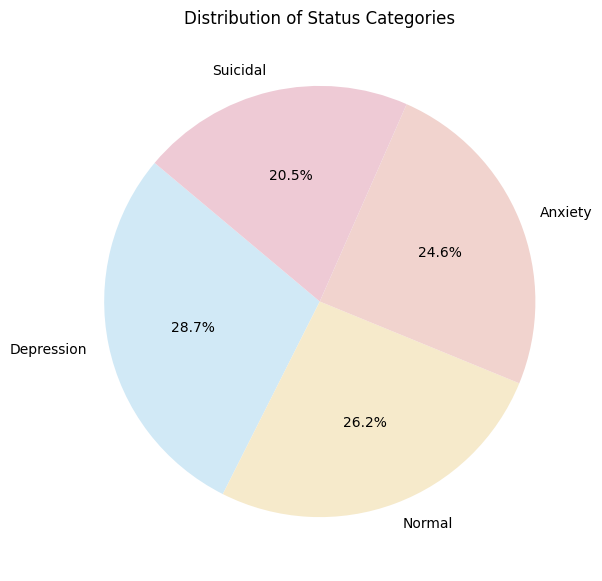

In [34]:
#count the occurrences of each category
status_counts = df['status'].value_counts()
colors = ['#D1E9F6', '#F6EACB', '#F1D3CE', '#EECAD5', '#F7B5CA', '#F7B5CA', '#F0A8D0']
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribution of Status Categories')
plt.show()

In [35]:
#Get a random statement from each group
random_statements = {}
for category in df['status'].unique():
    random_statements[category] = df[df['status'] == category]['statement'].sample().values[0]
    print(f"{category}: {random_statements[category]}")
    print()


Anxiety: Anxiety about taking Zoloft for the first time, can I have some encouragement? I’m a 19f. I’ve been struggling with anxiety since highschool. I was raised to believe medicines for this kind of thing are evil. But I cant live like this anymore. I’m anxious 24/7. It never stops. My panic attacks will last hours sometimes. 

I’m scared of becoming a zombie. I don’t want my good emotions to be taken. I don’t want to derealize and become numb. Idk, I’m scared. Hilariously I’m anxious about it. I was just wondering, will I go numb? What if I’m so numb I don’t even realize it? What if I’m so numb I can’t decide to stop taking it?

Depression: Spent the past few weeks to meet all my friends and the family members who would still talk to me, since I thought it would be nice to see them one last time.I have fucked up everything I could in my life. I got a degree in a field in which I am unable to properly work in and I no longer see any point in doing it. I have become a useless piece o

In [36]:
#descriptive statistics
#count the number of words in text columns

df['word_count'] = df['statement'].apply(lambda x: len(str(x).split()))
df.head(), df['word_count'].describe()

(                                           statement   status  word_count
 0  Is this health anxiety? 1) checking temperatur...  Anxiety          30
 1  Is there any way to sleep better? I can't slee...  Anxiety          17
 2  Lamictal ? Anyone with good reviews about lami...  Anxiety           8
 3  Has anyone tried EMDR therapy? I just started....  Anxiety          31
 4  would my may2018 ECG of picked this up? worrie...  Anxiety         273,
 count    12200.000000
 mean       117.559918
 std        161.079818
 min          1.000000
 25%         17.000000
 50%         66.000000
 75%        158.000000
 max       4239.000000
 Name: word_count, dtype: float64)

{'Mean': 117.55991803278688, 'Median': 66.0, 'Mode': 5, 'Variance': 25946.707615372074, 'Standard Deviation': 161.07981752960882, '25th Percentile (Q1)': 17.0, '75th Percentile (Q3)': 158.0, 'IQR': 141.0, 'Lower Bound': -194.5, 'Upper Bound': 369.5, 'Number of Outliers': 724}


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


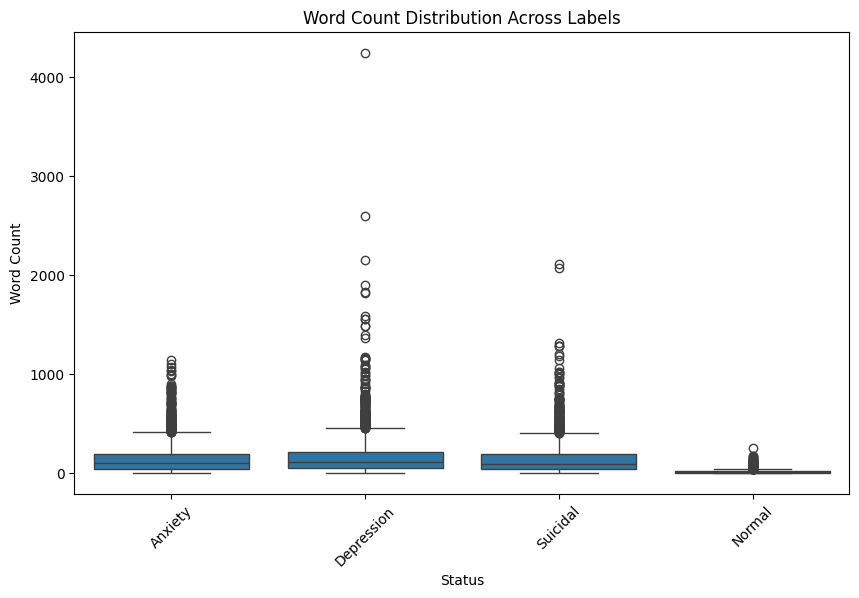

In [40]:
# Calculate statistics for word count
word_count_mode = df['word_count'].mode()[0]
word_count_variance = df['word_count'].var()
Q1 = df['word_count'].quantile(0.25)
Q3 = df['word_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['word_count'] < lower_bound) | (df['word_count'] > upper_bound)]

# Summary of statistics
word_count_summary = {
    'Mean': df['word_count'].mean(),
    'Median': df['word_count'].median(),
    'Mode': word_count_mode,
    'Variance': word_count_variance,
    'Standard Deviation': df['word_count'].std(),
    '25th Percentile (Q1)': Q1,
    '75th Percentile (Q3)': Q3,
    'IQR': IQR,
    'Lower Bound': lower_bound,
    'Upper Bound': upper_bound,
    'Number of Outliers': len(outliers)
}

print(word_count_summary)

# Box plot for word count distribution across labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='word_count', data=df)
plt.xlabel('Status')
plt.ylabel('Word Count')
plt.title('Word Count Distribution Across Labels')
plt.xticks(rotation=45)
plt.show()




*   Heavily skewed data: The boxplot shows that most of the documents have a relatively low word count, but there are several documents with very high word counts, creating a long upper tail.
*   Outliers: Many documents have unusually high word counts compared to the rest, which are identified as outliers. These might require further inspection to decide whether they are legitimate data points or if they should be excluded for specific analyses.



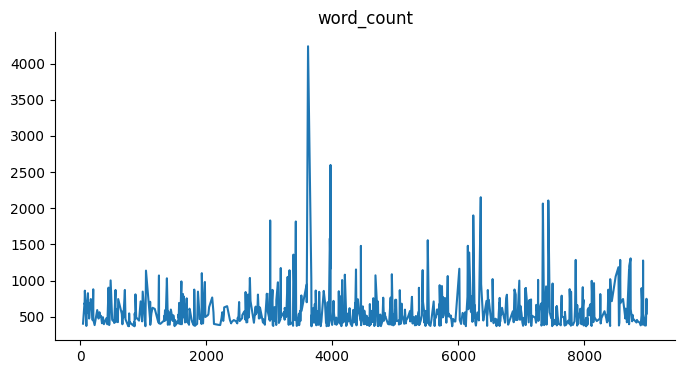

In [41]:
#word_count

from matplotlib import pyplot as plt
outliers['word_count'].plot(kind='line', figsize=(8, 4), title='word_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [42]:
#outlier removal
df_cleaned = df[~df['word_count'].isin(outliers['word_count'])]
df_cleaned.head()

,statement,status,word_count
0,Is this health anxiety? 1) checking temperatur...,Anxiety,30
1,Is there any way to sleep better? I can't slee...,Anxiety,17
2,Lamictal ? Anyone with good reviews about lami...,Anxiety,8
3,Has anyone tried EMDR therapy? I just started....,Anxiety,31
4,would my may2018 ECG of picked this up? worrie...,Anxiety,273


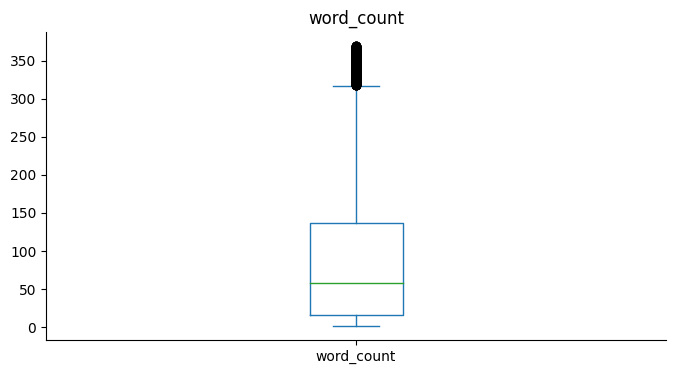

In [47]:
#outlier boxplot
df_cleaned['word_count'].plot(kind='box', figsize=(8, 4), title='word_count')
plt.gca().spines[['top', 'right']].set_visible(False)

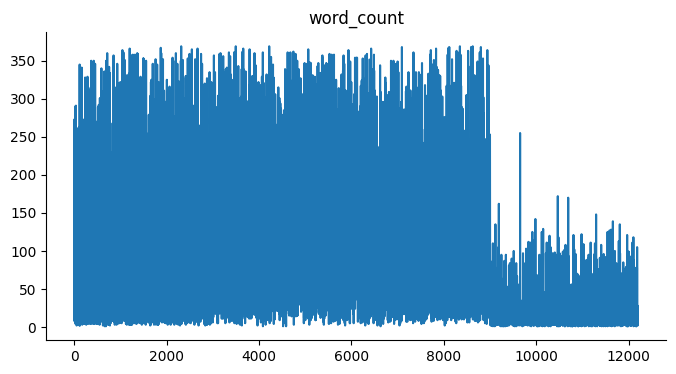

In [43]:
# word_count

from matplotlib import pyplot as plt
df_cleaned['word_count'].plot(kind='line', figsize=(8, 4), title='word_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [44]:
#check for null values after cleaning
print(df_cleaned.isnull().sum())

statement     0
status        0
word_count    0
dtype: int64


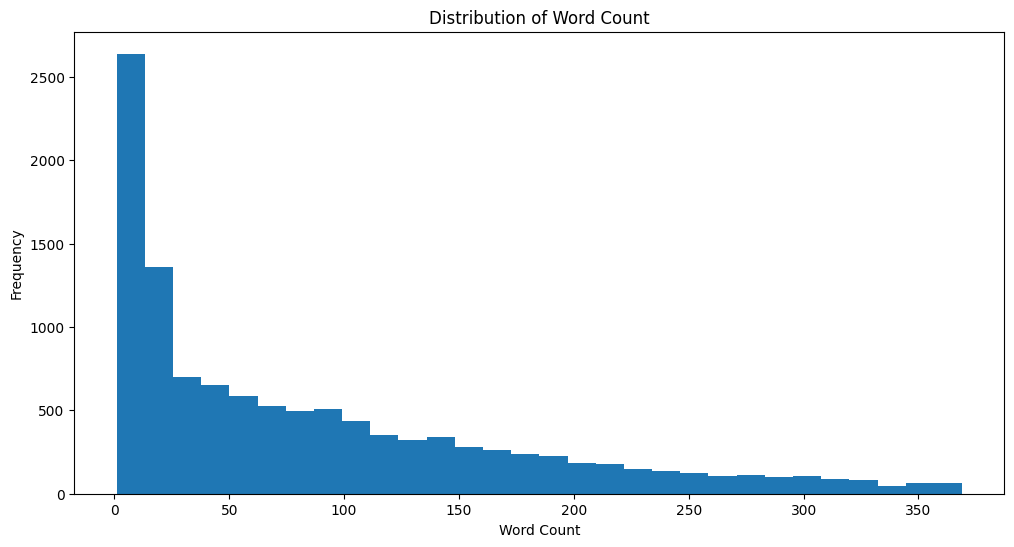

In [48]:
#distribution patterns
plt.figure(figsize=(12,6))
plt.hist(df_cleaned['word_count'], bins=30)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [49]:
# Mean of word count
sample_mean = df_cleaned['word_count'].mean()
print(f'Sample Mean: {sample_mean}')

# Percentiles
percentile_25 = np.percentile(df_cleaned['word_count'], 25)
percentile_75 = np.percentile(df_cleaned['word_count'], 75)
print(f'25th Percentile: {percentile_25}, 75th Percentile: {percentile_75}')

# Median and third quartile
median = df_cleaned['word_count'].median()
Q3 = np.percentile(df_cleaned['word_count'], 75)
print(f'Median: {median}, Third Quartile (Q3): {Q3}')


Sample Mean: 88.23623213663298
25th Percentile: 15.0, 75th Percentile: 136.0
Median: 58.0, Third Quartile (Q3): 136.0


In [50]:
# Trimmed mean
import scipy.stats as stats
def trim_mean(data, proportiontocut):
    trimmed_data = stats.trim_mean(data, proportiontocut)
    return trimmed_data
trim_fraction = 0.1  # Adjust this based on the desired level of trimming
trimmed_mean = trim_mean(df_cleaned['word_count'], proportiontocut=trim_fraction)
print(f'Trimmed Mean: {trimmed_mean}')

#Trimmed median
trimmed_median = stats.trim_mean(df_cleaned['word_count'], proportiontocut=trim_fraction)
print(f'Trimmed Median: {trimmed_median}')

# Standard deviation
trimmed_std = df_cleaned['word_count'].std()
print(f'Trimmed Standard Deviation: {trimmed_std}')


Trimmed Mean: 74.12186887388368
Trimmed Median: 74.12186887388368
Trimmed Standard Deviation: 88.55153101359696


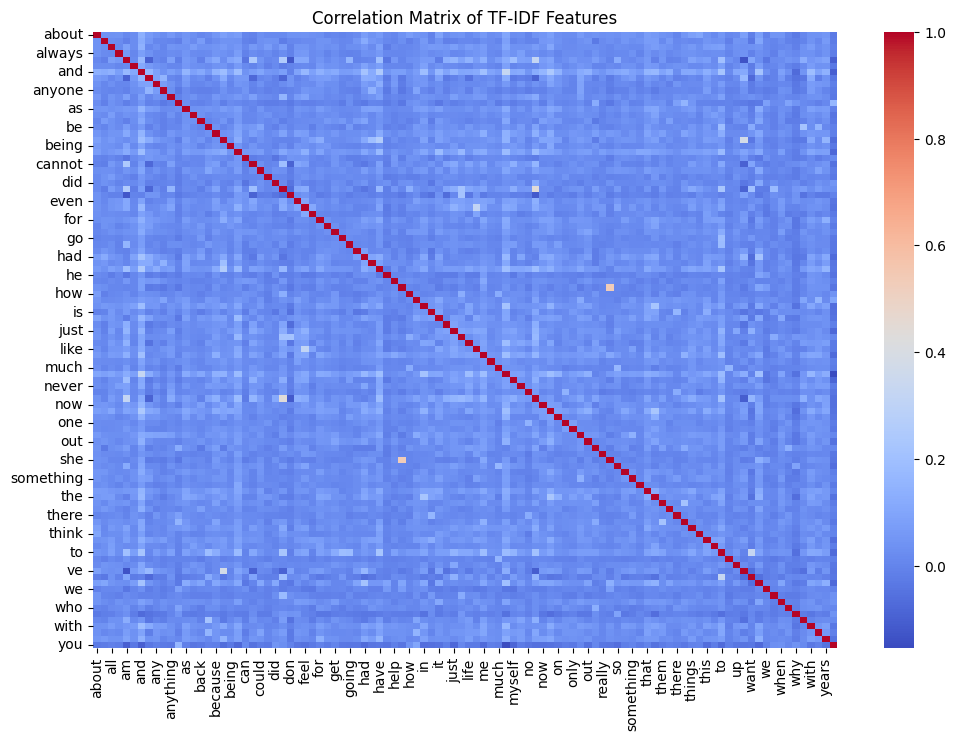

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Apply TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=100)  # Limit to top 100 features (words)
tfidf_matrix = tfidf.fit_transform(df['statement'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Compute the correlation matrix
correlation_matrix = tfidf_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of TF-IDF Features')
plt.show()


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, matthews_corrcoef, cohen_kappa_score
)
X_tfidf = tfidf_df
y = df['status']  # Labels (mental health conditions)

# Function to run experiments with different algorithms and evaluation metrics
def run_experiment(model, model_name):
    results = {}

    for split in [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]:
        X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=split[1], random_state=42)

        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Check if model supports predict_proba
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
        else:
            y_prob = None  # No probability predictions available

        # Collect all evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Use ROC-AUC and Log-Loss only if probability predictions are available
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else 'N/A'
        loss = log_loss(y_test, y_prob) if y_prob is not None else 'N/A'

        cm = confusion_matrix(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)

        results[split] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC-ROC': auc,
            'Confusion Matrix': cm,
            'Log-Loss': loss,
            'MCC': mcc,
            'Cohen\'s Kappa': kappa
        }

    return results

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True)
}

# Running experiments for all models
for name, model in models.items():
    print(f"Running experiments for {name}...")
    results = run_experiment(model, name)

    # Display the results
    for split, metrics in results.items():
        print(f"\nTrain-Test Split: {split[0]*100}-{split[1]*100}")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")


Running experiments for Logistic Regression...

Train-Test Split: 50.0-50.0
Accuracy: 0.6681967213114755
Precision: 0.6620099762553197
Recall: 0.6646529880474377
F1-Score: 0.6608316975289197
AUC-ROC: 0.8804171448045384
Confusion Matrix: [[1079  189  225   21]
 [ 223  987  171  398]
 [ 113   53 1371   24]
 [  41  461  105  639]]
Log-Loss: 0.7921528570585584
MCC: 0.5561001283280116
Cohen's Kappa: 0.5547435942099357

Train-Test Split: 60.0-40.0
Accuracy: 0.6727459016393442
Precision: 0.6670380495499011
Recall: 0.6684314638784886
F1-Score: 0.6647339196584248
AUC-ROC: 0.8809355927531243
Confusion Matrix: [[ 870  145  173   18]
 [ 183  804  140  298]
 [  76   43 1109   20]
 [  30  387   84  500]]
Log-Loss: 0.7893405006301598
MCC: 0.5621334038160333
Cohen's Kappa: 0.56057223223336

Train-Test Split: 70.0-30.0
Accuracy: 0.6669398907103825
Precision: 0.6623971986092119
Recall: 0.6631209332945719
F1-Score: 0.6593183461745981
AUC-ROC: 0.8797561449033783
Confusion Matrix: [[641 103 132  16]
 [150 

status
Depression    3500
Normal        3200
Anxiety       3000
Suicidal      2500
Name: count, dtype: int64
Anxiety: Problems with stomach and I feel like I'm about to fall apart... Recently, I began having problems with my stomach and I'm paranoid/panicking that they are something worse.  


I'm 20, Asian, overweight (195 at 5'11), and I'm worried that the symptoms I have are something really bad- abdominal pain, gas issues, constipation, diarrhea, and yellow, runny stool that I don't know where it came from.  


Has anyone have symptoms like this? Do they know where they came from and why? Is it a sign of something bad? Because I'm on the verge of panicking right now and need to know.
Depression: I thought I had a handle of it. I was creeping away from the edge for a long time but the past couple months my head space has shifted and I cannot pull myself out of it for more than a day.I keep putting everything I have learnt into practice. It makes me feel a bit better for a short time

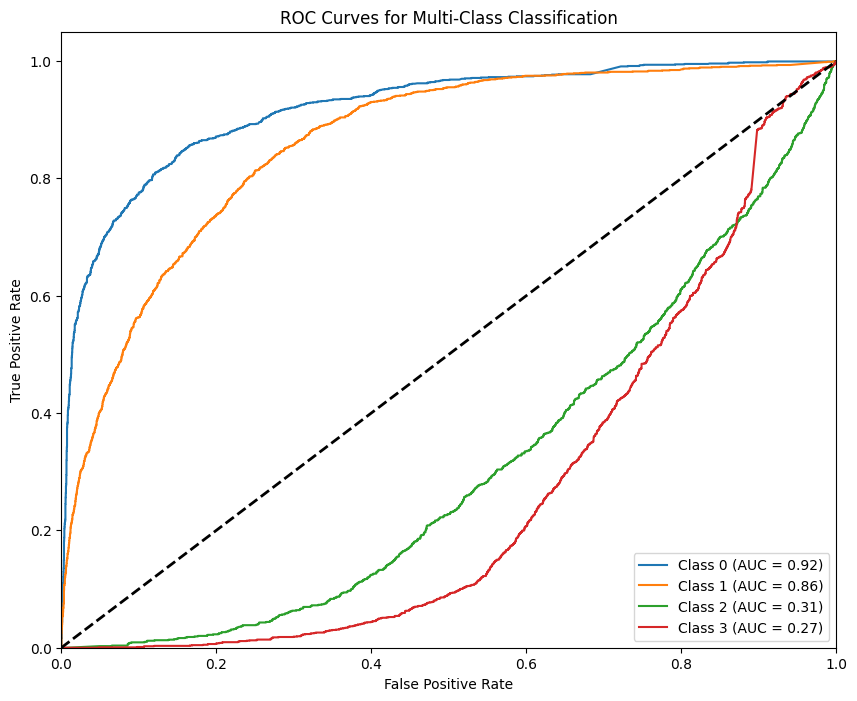

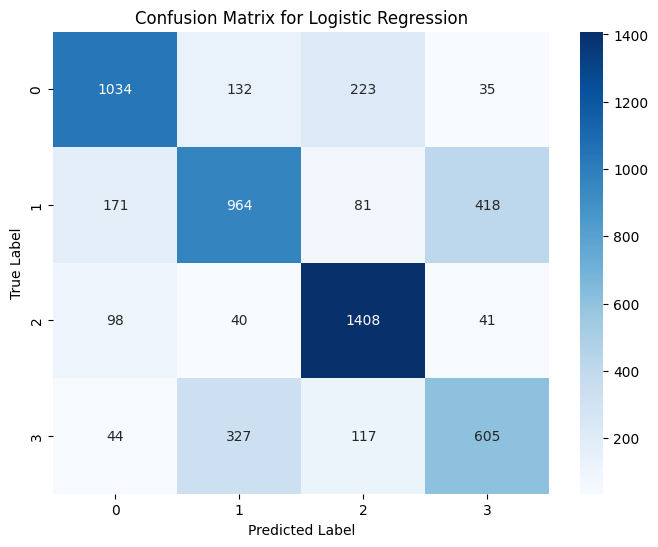

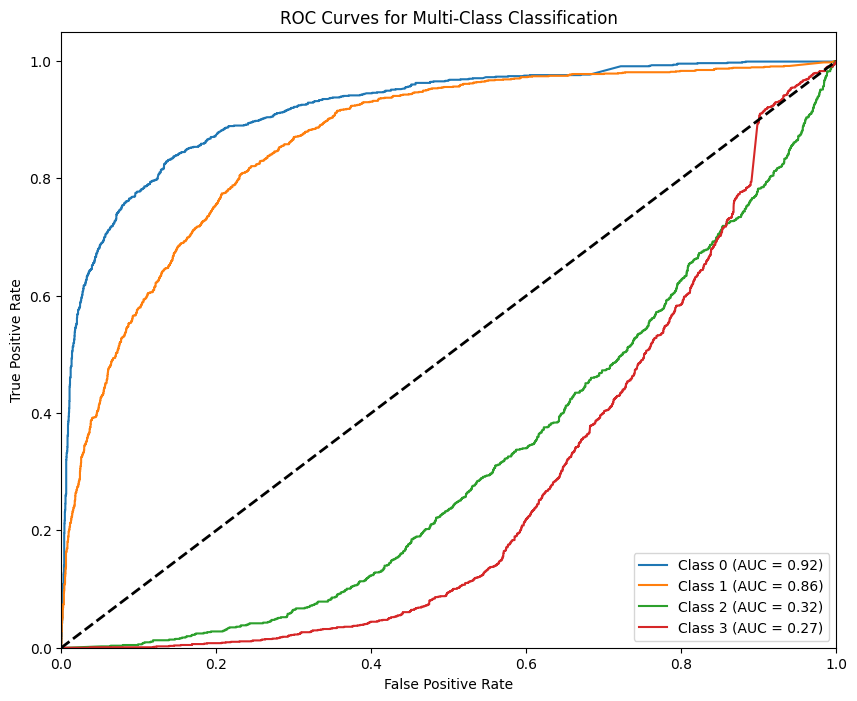

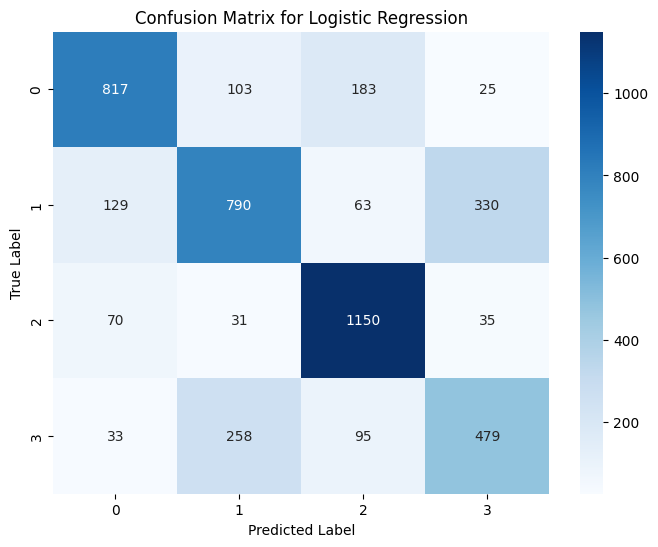

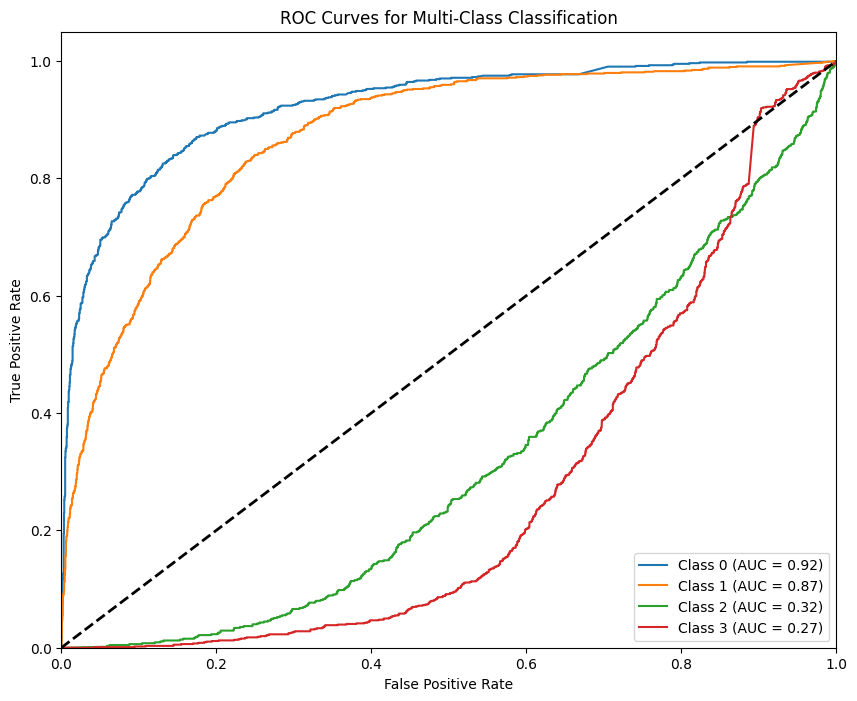

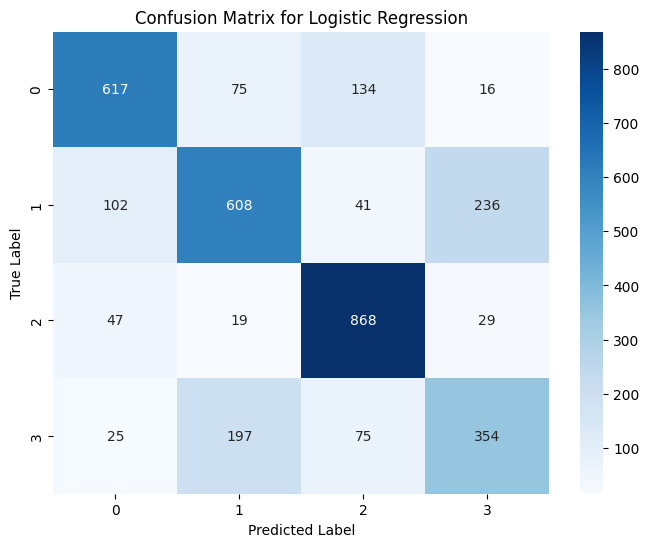

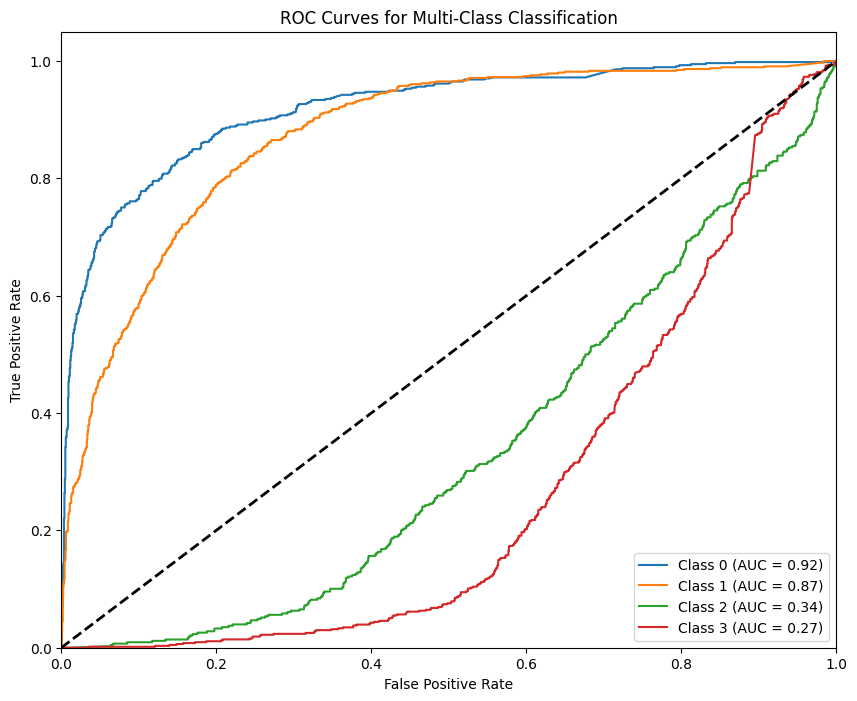

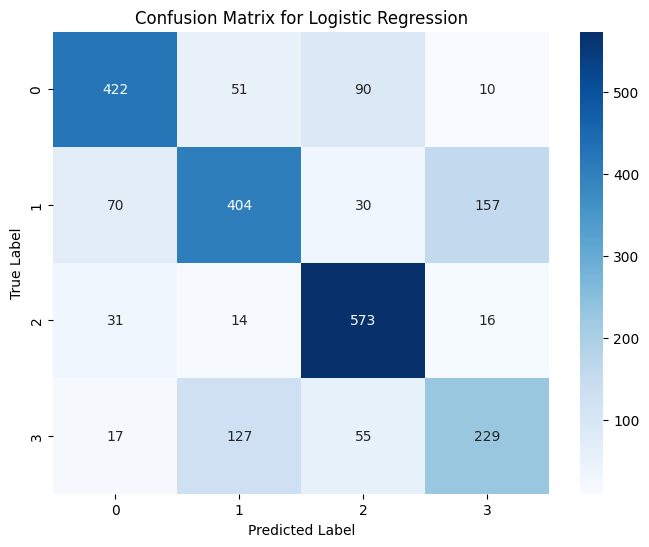


Train-Test Split: 50.0-50.0
Accuracy: 0.6990240501917044
Precision: 0.6867179575377186
Recall: 0.6892044651995362
F1-Score: 0.6863005463715972
AUC-ROC: 0.5885008427249003
Confusion Matrix: [[1034  132  223   35]
 [ 171  964   81  418]
 [  98   40 1408   41]
 [  44  327  117  605]]
MCC: 0.5968727580931822
Cohen's Kappa: 0.5957299369651222

Train-Test Split: 60.0-40.0
Accuracy: 0.7048573295578305
Precision: 0.6924246050757508
Recall: 0.6936069687723655
F1-Score: 0.691201588531137
AUC-ROC: 0.5925405759670472
Confusion Matrix: [[ 817  103  183   25]
 [ 129  790   63  330]
 [  70   31 1150   35]
 [  33  258   95  479]]
MCC: 0.6043746459507987
Cohen's Kappa: 0.6031160038774759

Train-Test Split: 70.0-30.0
Accuracy: 0.7107173976183561
Precision: 0.6975497528726259
Recall: 0.6984789881698047
F1-Score: 0.6962934650416563
AUC-ROC: 0.5958049713432207
Confusion Matrix: [[617  75 134  16]
 [102 608  41 236]
 [ 47  19 868  29]
 [ 25 197  75 354]]
MCC: 0.6120021609997708
Cohen's Kappa: 0.61079686002

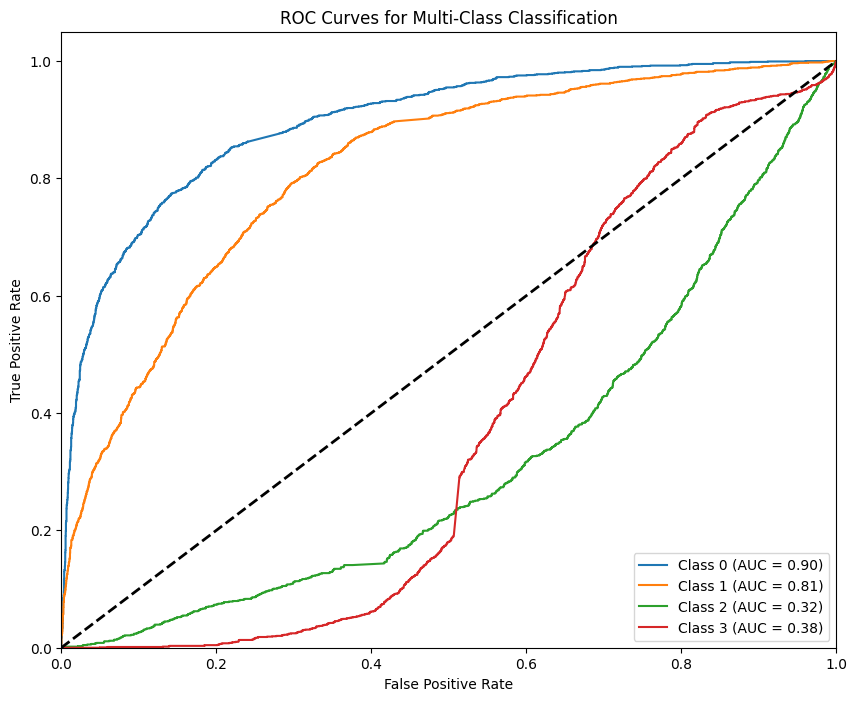

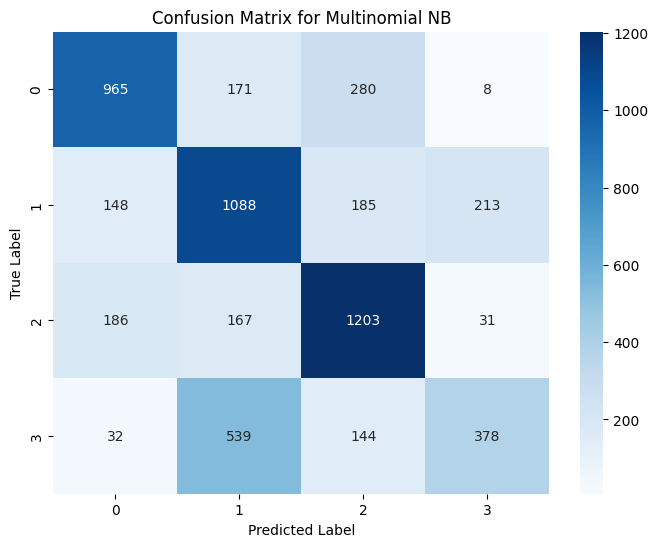

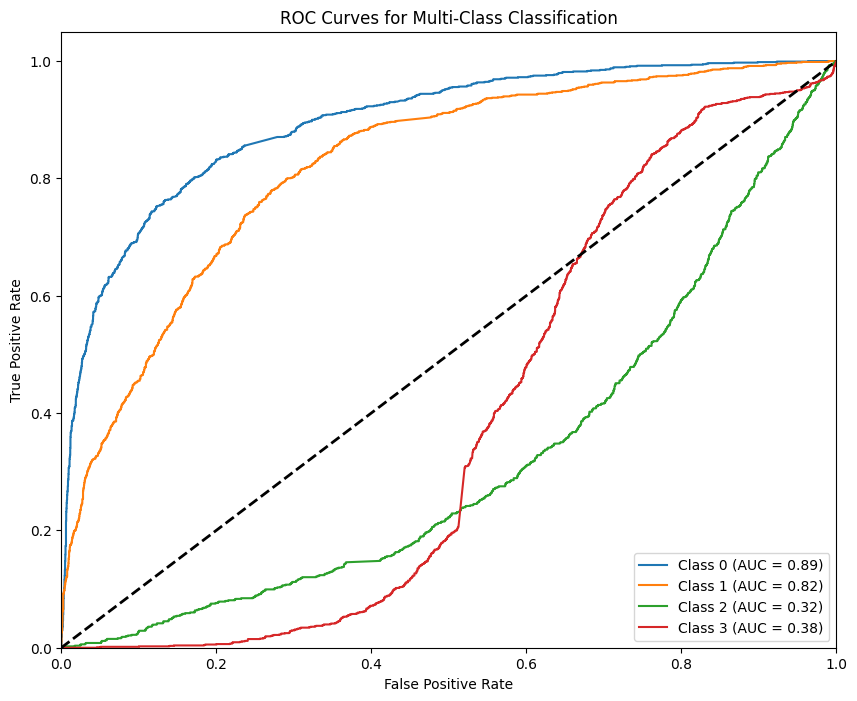

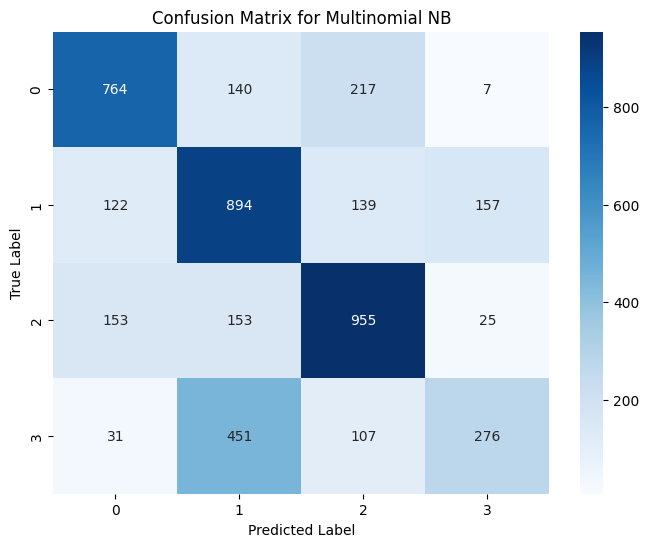

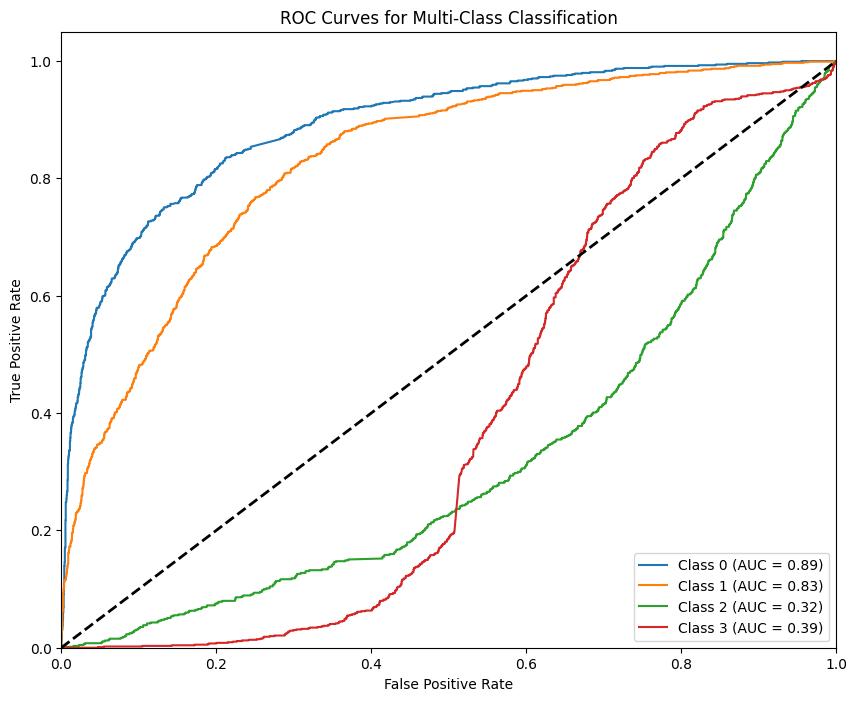

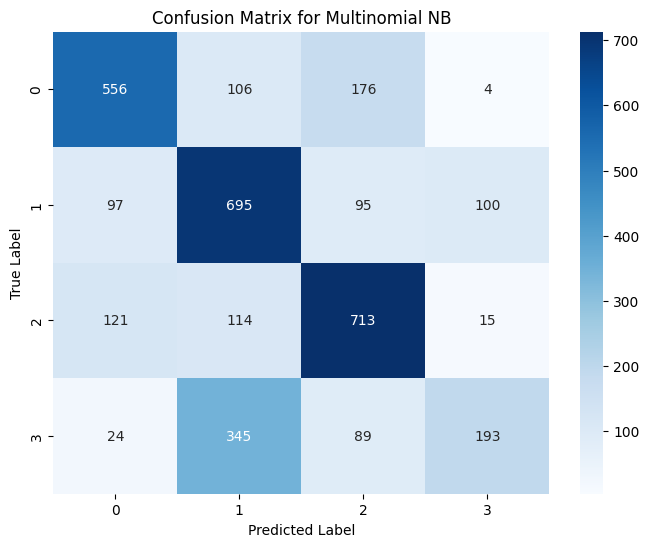

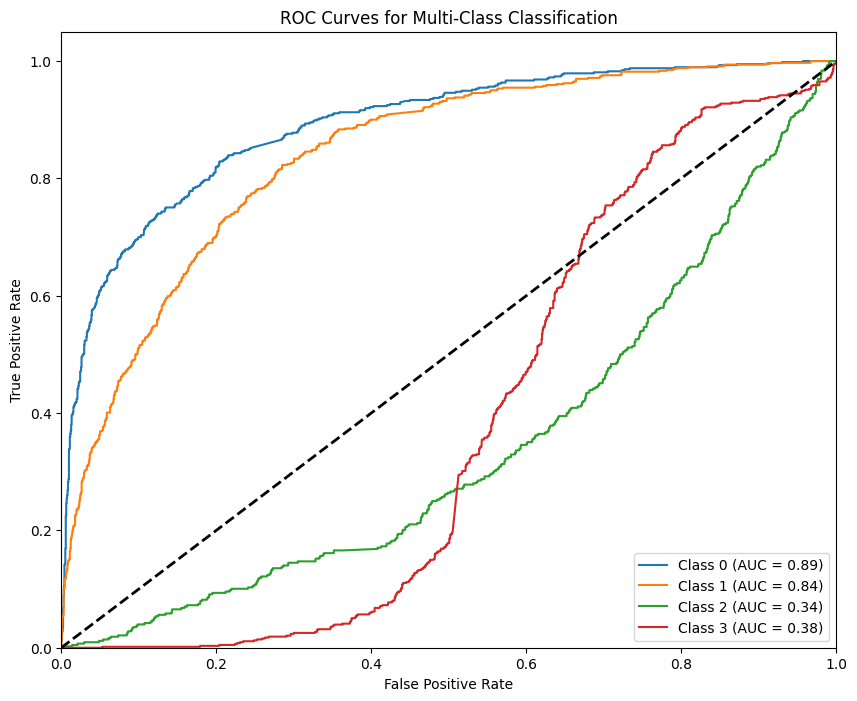

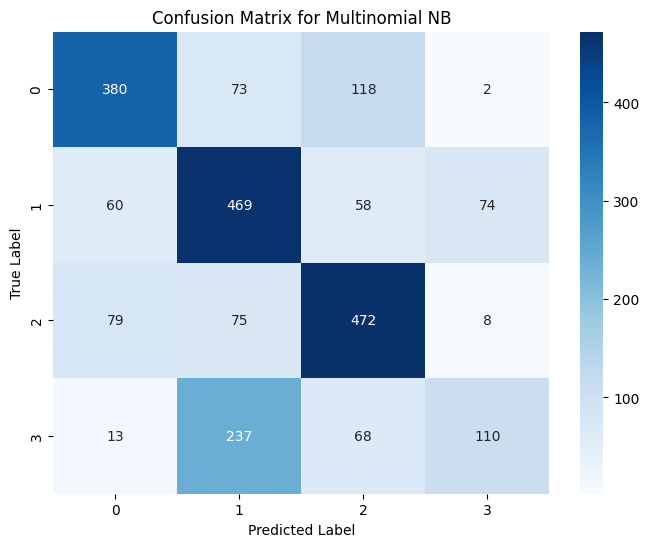


Train-Test Split: 50.0-50.0
Accuracy: 0.6333217148832345
Precision: 0.635653908767065
Recall: 0.6118475961141665
F1-Score: 0.612945424103402
AUC-ROC: 0.60182427399729
Confusion Matrix: [[ 965  171  280    8]
 [ 148 1088  185  213]
 [ 186  167 1203   31]
 [  32  539  144  378]]
MCC: 0.5063300401156444
Cohen's Kappa: 0.5022419158105695

Train-Test Split: 60.0-40.0
Accuracy: 0.6292746678283598
Precision: 0.631709601111224
Recall: 0.6050988251984213
F1-Score: 0.605669417419179
AUC-ROC: 0.6050227102513271
Confusion Matrix: [[764 140 217   7]
 [122 894 139 157]
 [153 153 955  25]
 [ 31 451 107 276]]
MCC: 0.5004820688375123
Cohen's Kappa: 0.49573191996743304

Train-Test Split: 70.0-30.0
Accuracy: 0.6264885274469939
Precision: 0.6328527445247045
Recall: 0.6003370294220128
F1-Score: 0.599468756573748
AUC-ROC: 0.6071413290534452
Confusion Matrix: [[556 106 176   4]
 [ 97 695  95 100]
 [121 114 713  15]
 [ 24 345  89 193]]
MCC: 0.4971764488555079
Cohen's Kappa: 0.4912038217014303

Train-Test Spl

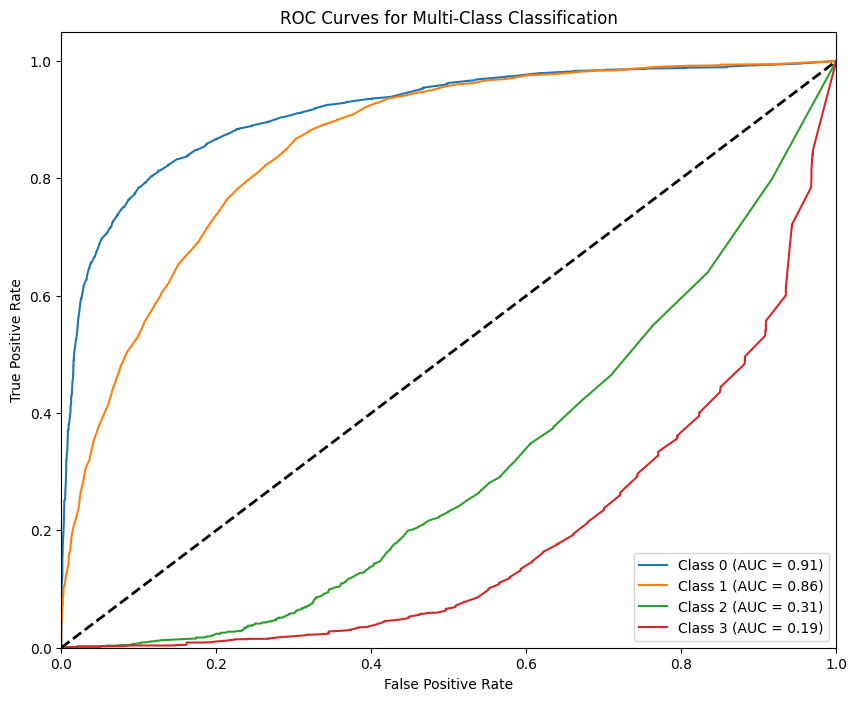

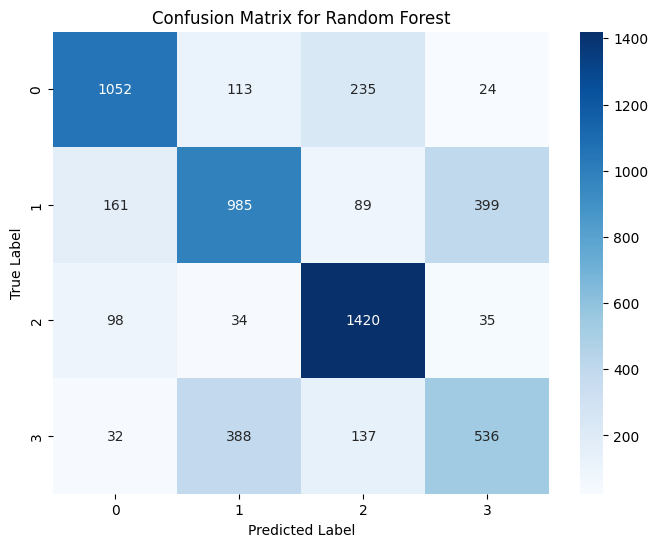

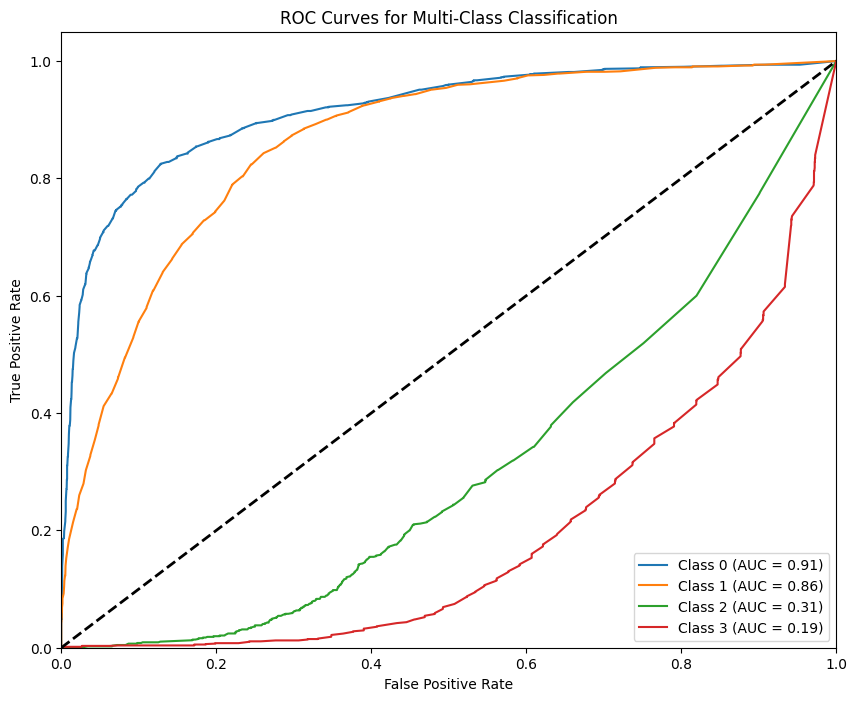

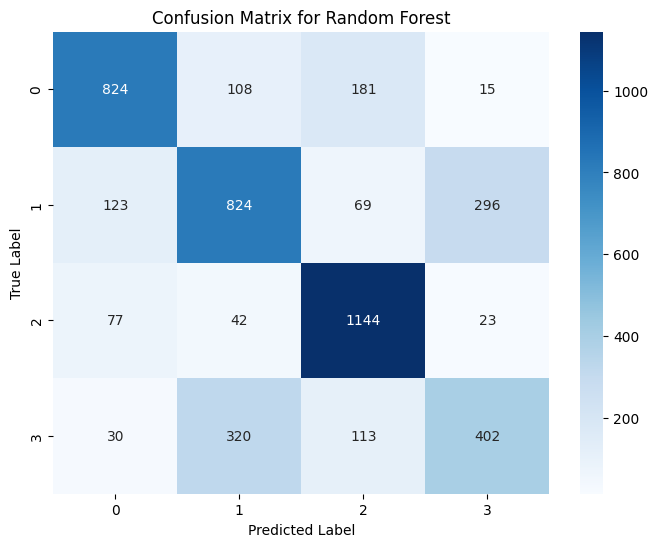

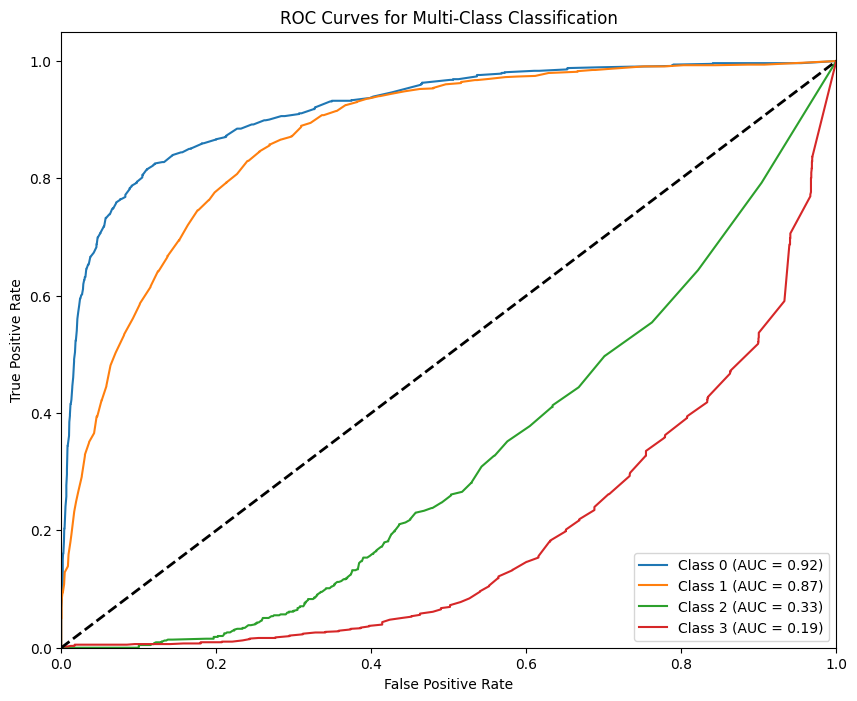

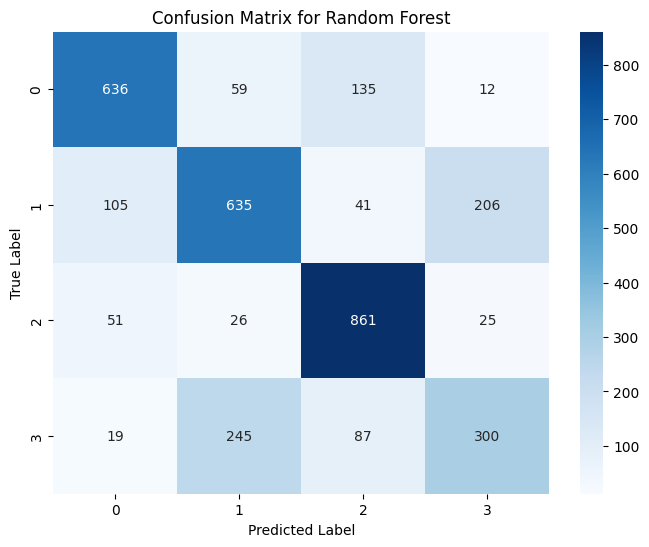

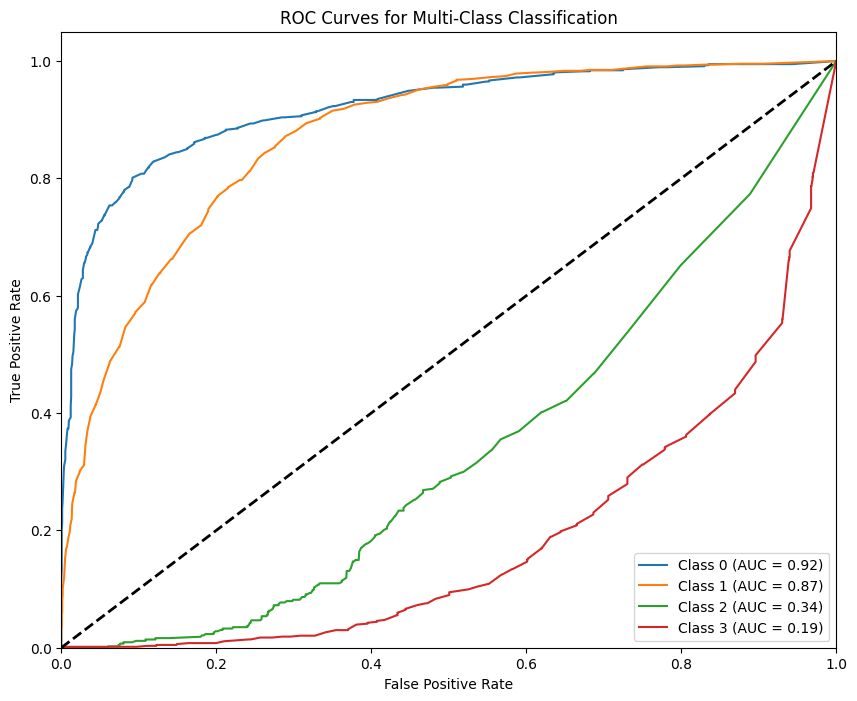

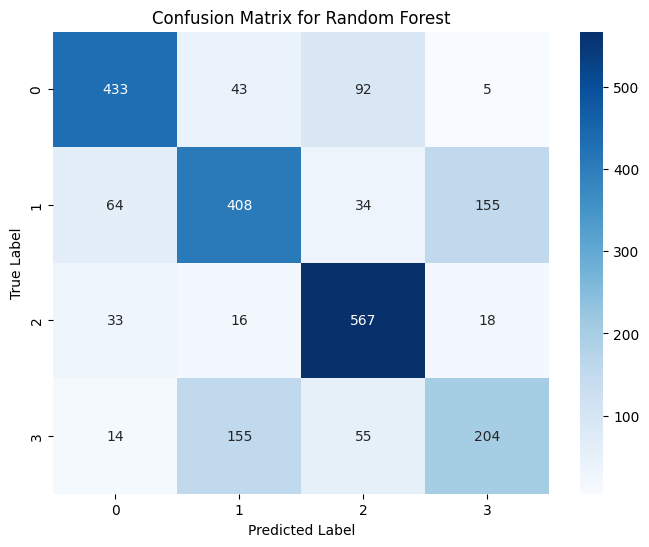


Train-Test Split: 50.0-50.0
Accuracy: 0.6958870686650401
Precision: 0.6813750621483036
Recall: 0.6816856603373496
F1-Score: 0.6793914398512009
AUC-ROC: 0.5671249609759752
Confusion Matrix: [[1052  113  235   24]
 [ 161  985   89  399]
 [  98   34 1420   35]
 [  32  388  137  536]]
MCC: 0.592002345564587
Cohen's Kappa: 0.5905943764108212

Train-Test Split: 60.0-40.0
Accuracy: 0.6957089958614681
Precision: 0.6809721458167639
Recall: 0.6782163030235437
F1-Score: 0.6772585404304312
AUC-ROC: 0.5703735255726889
Confusion Matrix: [[ 824  108  181   15]
 [ 123  824   69  296]
 [  77   42 1144   23]
 [  30  320  113  402]]
MCC: 0.590651769935934
Cohen's Kappa: 0.5892912774904763

Train-Test Split: 70.0-30.0
Accuracy: 0.7063607319198374
Precision: 0.6901871317083108
Recall: 0.6884046591236652
F1-Score: 0.686936277254391
AUC-ROC: 0.5768054665828986
Confusion Matrix: [[636  59 135  12]
 [105 635  41 206]
 [ 51  26 861  25]
 [ 19 245  87 300]]
MCC: 0.6050387038176408
Cohen's Kappa: 0.6036818513708

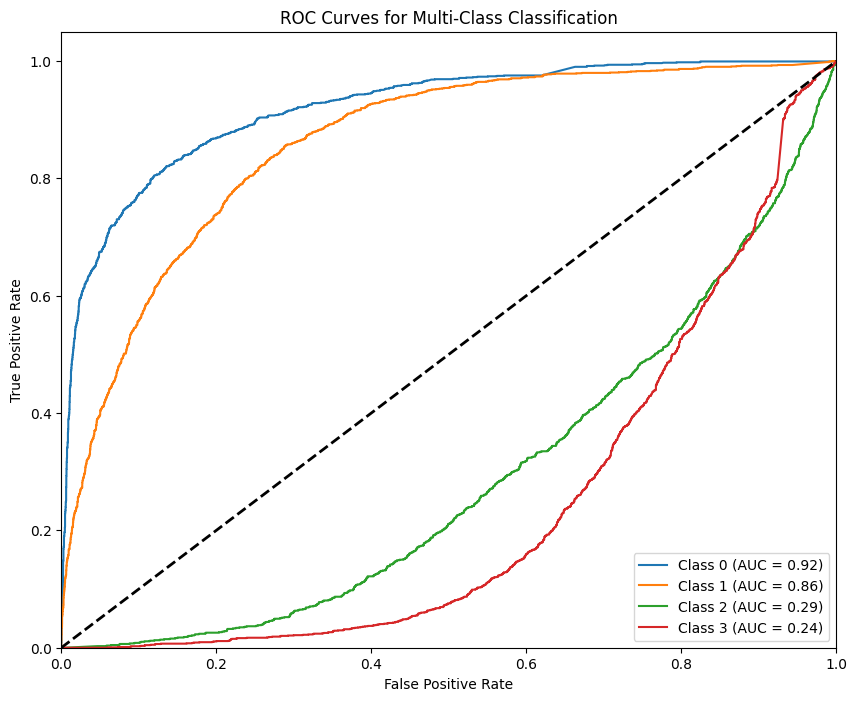

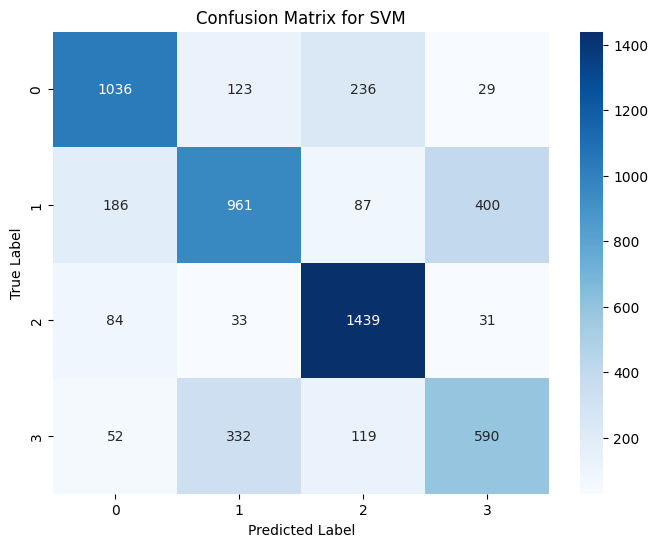

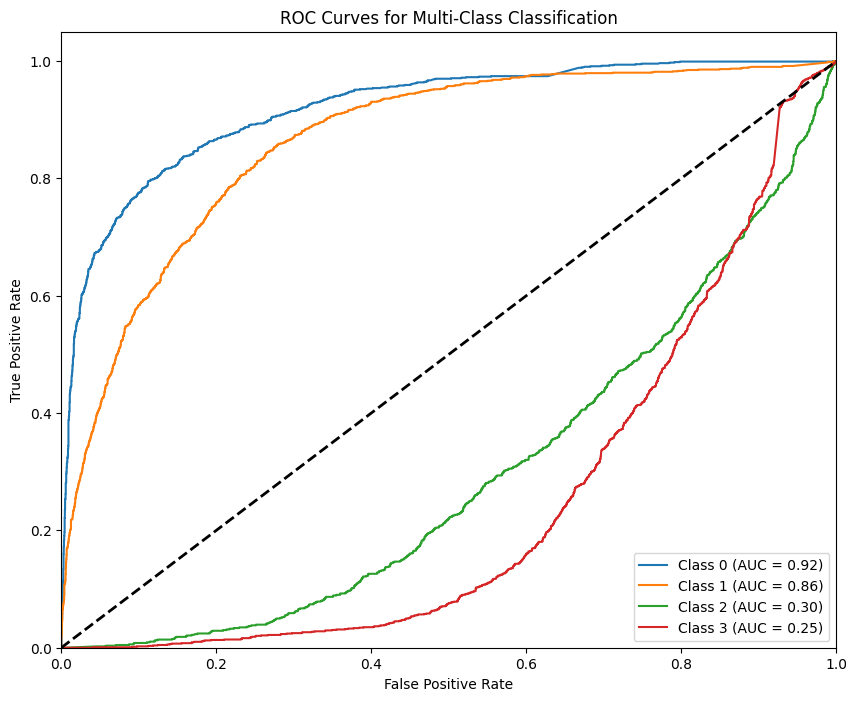

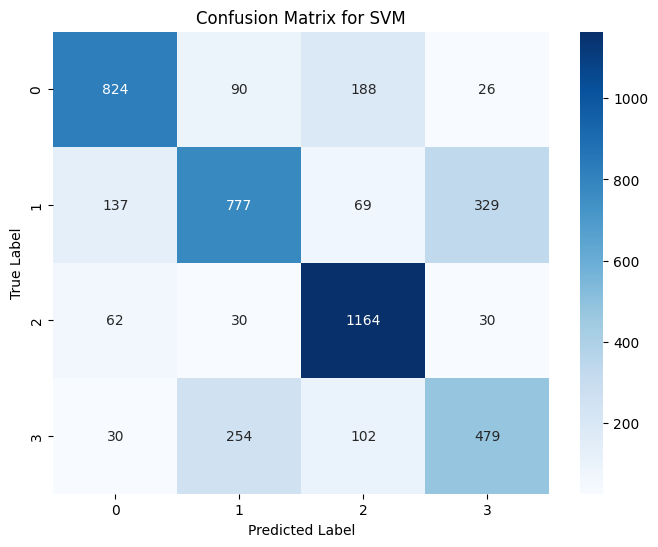

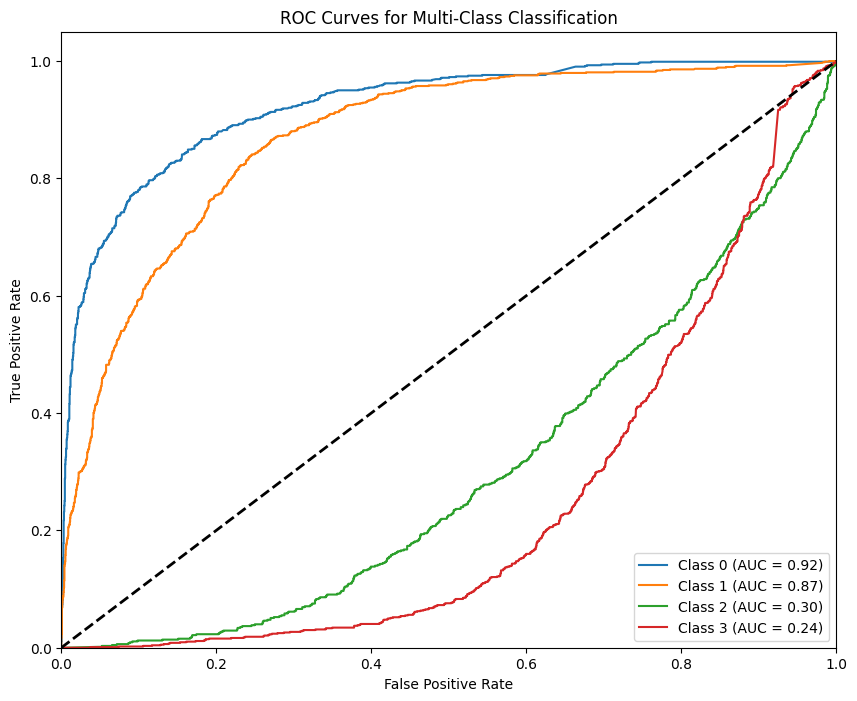

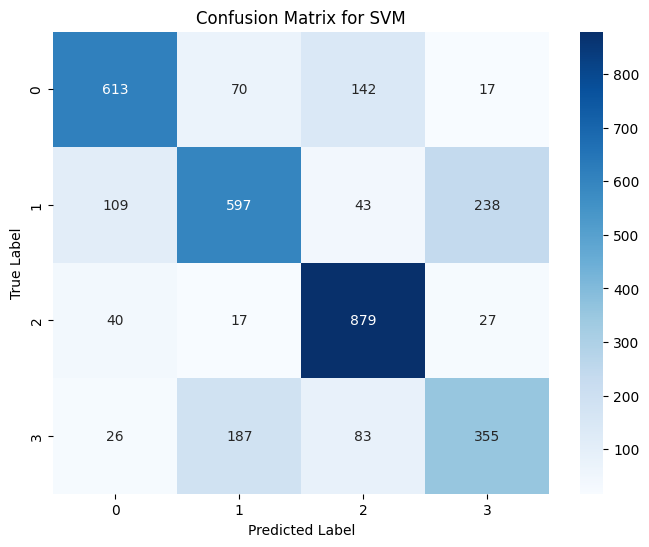

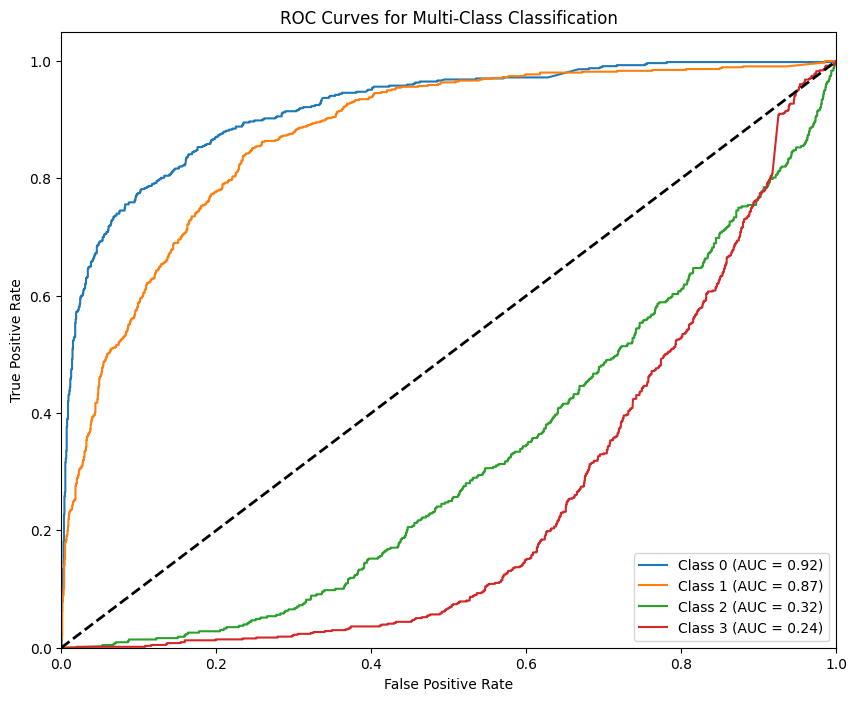

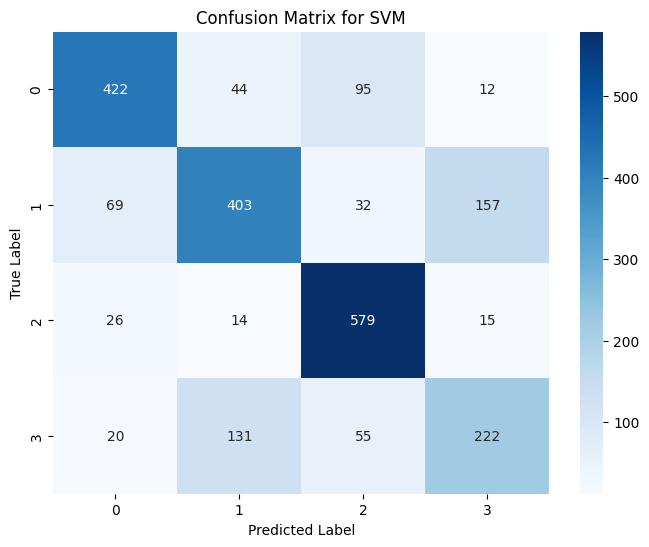


Train-Test Split: 50.0-50.0
Accuracy: 0.7016382014639247
Precision: 0.6882564945022187
Recall: 0.6905490962560901
F1-Score: 0.6871774385136116
AUC-ROC: 0.5768434694688465
Confusion Matrix: [[1036  123  236   29]
 [ 186  961   87  400]
 [  84   33 1439   31]
 [  52  332  119  590]]
MCC: 0.6004442579107777
Cohen's Kappa: 0.5988852606628665

Train-Test Split: 60.0-40.0
Accuracy: 0.7065998693095186
Precision: 0.6940676122578884
Recall: 0.6954028704840918
F1-Score: 0.6923491891531217
AUC-ROC: 0.5812902165408756
Confusion Matrix: [[ 824   90  188   26]
 [ 137  777   69  329]
 [  62   30 1164   30]
 [  30  254  102  479]]
MCC: 0.6071447179232963
Cohen's Kappa: 0.6054424403259857

Train-Test Split: 70.0-30.0
Accuracy: 0.7098460644786523
Precision: 0.6967461688617119
Recall: 0.6977448028177089
F1-Score: 0.6947978277062499
AUC-ROC: 0.5852947874500932
Confusion Matrix: [[613  70 142  17]
 [109 597  43 238]
 [ 40  17 879  27]
 [ 26 187  83 355]]
MCC: 0.611419646759229
Cohen's Kappa: 0.60966589452

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, matthews_corrcoef, cohen_kappa_score, roc_curve, auc
)
import scipy.stats as stats
from sklearn.preprocessing import label_binarize

# Load dataset
df = pd.read_csv('/content/balanced_dataset.csv')

# Fill missing text columns with an empty string
df.fillna('', inplace=True)

# Check distribution of categories in 'status' column
status_counts = df['status'].value_counts()
print(status_counts)

# Display a random statement from each category
random_statements = {}
for category in df['status'].unique():
    random_statements[category] = df[df['status'] == category]['statement'].sample().values[0]
    print(f"{category}: {random_statements[category]}")

# Calculate word counts
df['word_count'] = df['statement'].apply(lambda x: len(str(x).split()))

# Remove outliers based on word count (using IQR method)
Q1 = df['word_count'].quantile(0.25)
Q3 = df['word_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['word_count'] >= lower_bound) & (df['word_count'] <= upper_bound)]
print(f"Dataset size after outlier removal: {df_cleaned.shape[0]}")

# Apply TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=100)  # Limit to top 100 features (words)
tfidf_matrix = tfidf.fit_transform(df_cleaned['statement'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Prepare data for model training
X_tfidf = tfidf_df  # Features
y = df_cleaned['status']  # Labels (mental health conditions)

# Binarize the labels for multi-class ROC-AUC curves
y_bin = label_binarize(y, classes=y.unique())

# Function to plot ROC curve for a multi-class classification problem
def plot_roc_curve(y_test_bin, y_prob, n_classes):
    plt.figure(figsize=(10, 8))
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multi-Class Classification')
    plt.legend(loc='lower right')
    plt.show()

# Function to run experiments with different algorithms and evaluation metrics
def run_experiment(model, model_name):
    results = {}

    for split in [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]:
        X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=split[1], random_state=42)
        y_train_bin = label_binarize(y_train, classes=y.unique())
        y_test_bin = label_binarize(y_test, classes=y.unique())

        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Check if model supports predict_proba
        y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        auc_score = roc_auc_score(y_test_bin, y_prob, multi_class='ovr') if y_prob is not None else 'N/A'
        cm = confusion_matrix(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)

        # Plot ROC curve if probability predictions are available
        if y_prob is not None:
            plot_roc_curve(y_test_bin, y_prob, n_classes=y_bin.shape[1])

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        results[split] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC-ROC': auc_score,
            'Confusion Matrix': cm,
            'MCC': mcc,
            'Cohen\'s Kappa': kappa
        }

    return results

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True)
}

# Run experiments for all models
for name, model in models.items():
    print(f"\nRunning experiments for {name}...")
    results = run_experiment(model, name)

    # Display the results
    for split, metrics in results.items():
        print(f"\nTrain-Test Split: {split[0]*100}-{split[1]*100}")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Dataset size after outlier removal: 11465

Running experiments for Logistic Regression...


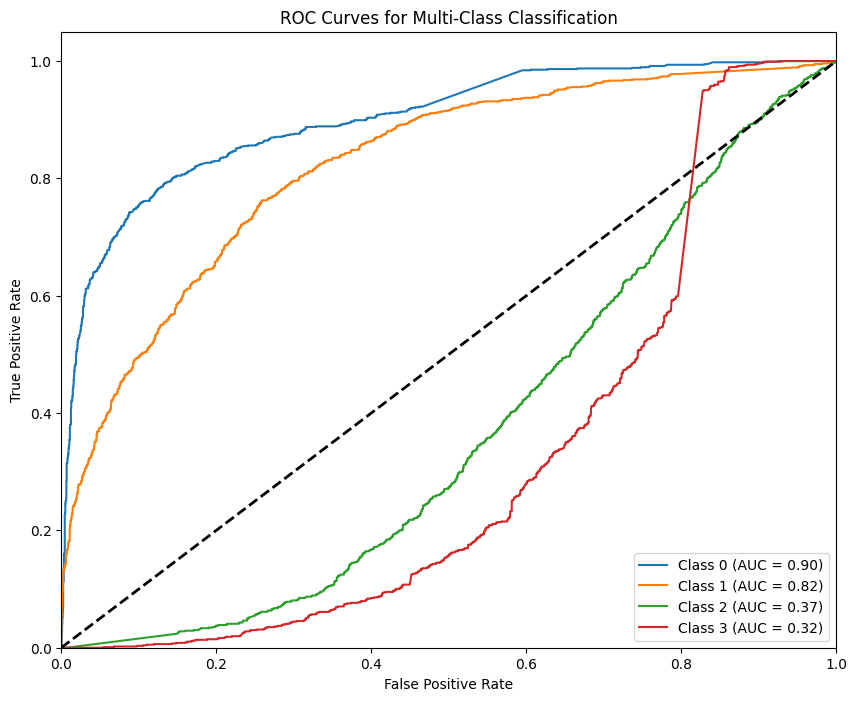

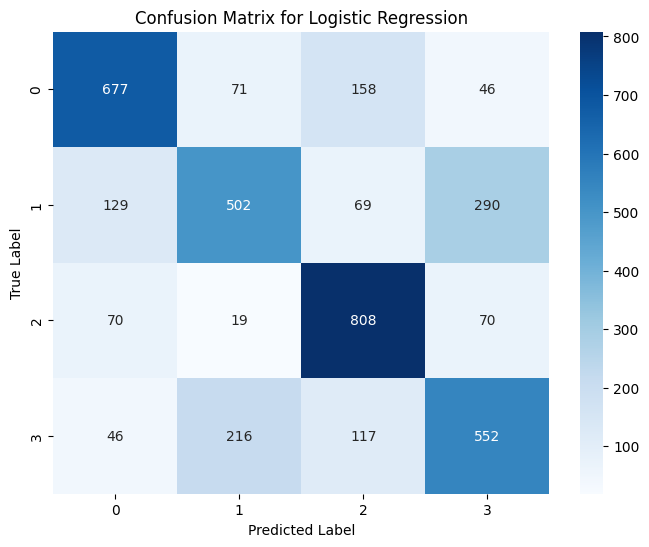


Train-Test Split: 70.0-30.0
Best Params: {'C': 1}
Accuracy: 0.6611979166666667
Precision: 0.6582874385025779
Recall: 0.6616724873557122
F1-Score: 0.6569942464238188
AUC-ROC: 0.6036408885774313
Confusion Matrix: [[677  71 158  46]
 [129 502  69 290]
 [ 70  19 808  70]
 [ 46 216 117 552]]

Running experiments for Random Forest...


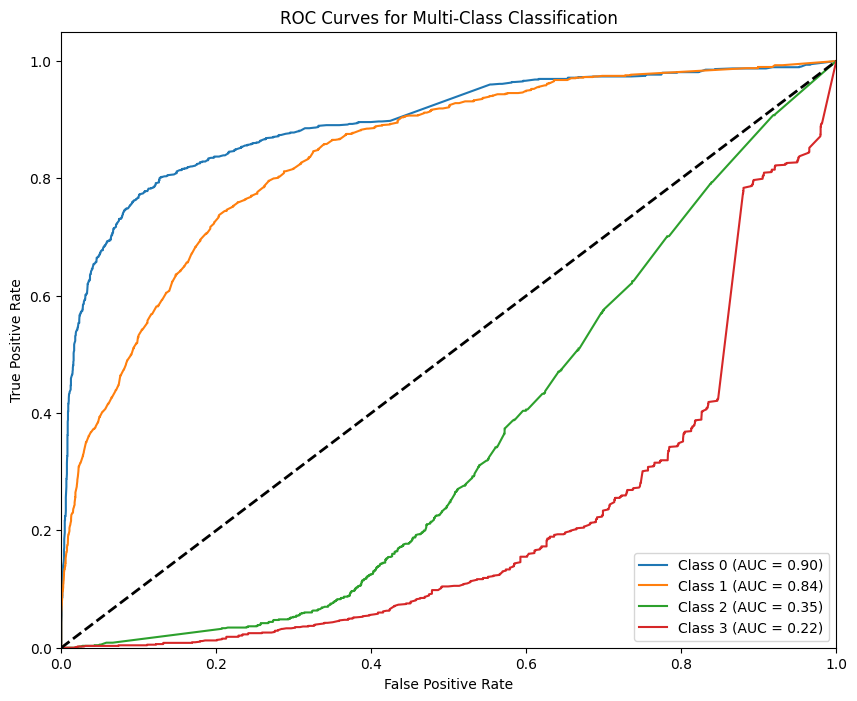

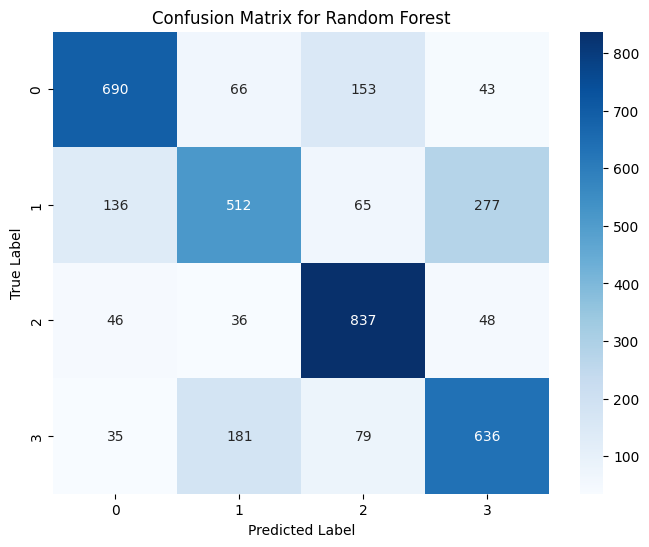


Train-Test Split: 70.0-30.0
Best Params: {'n_estimators': 200}
Accuracy: 0.6966145833333334
Precision: 0.6940840637880379
Recall: 0.6976654110892182
F1-Score: 0.6925329608347317
AUC-ROC: 0.5768309239971785
Confusion Matrix: [[690  66 153  43]
 [136 512  65 277]
 [ 46  36 837  48]
 [ 35 181  79 636]]

Running experiments for SVM...


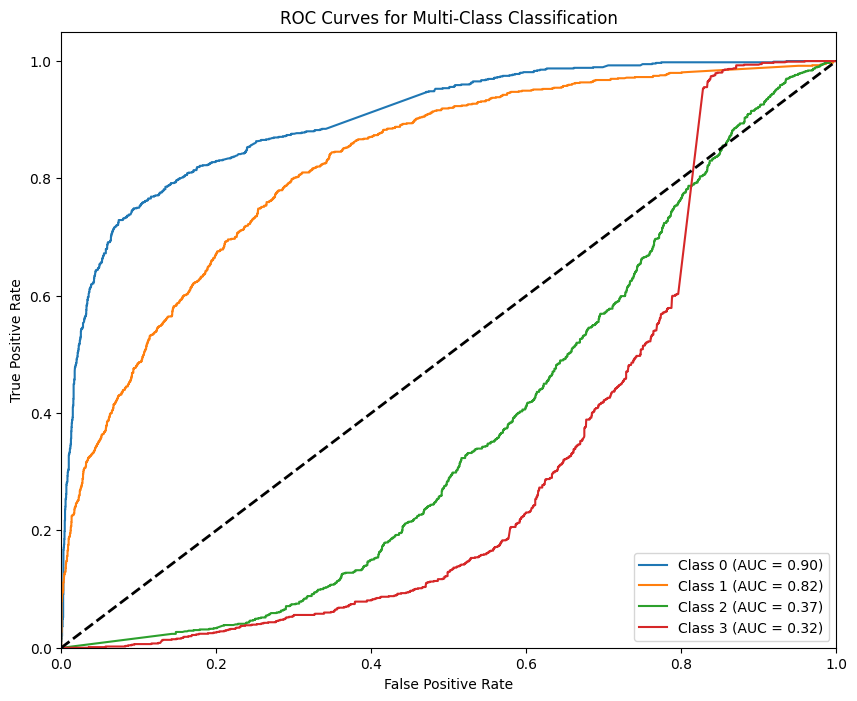

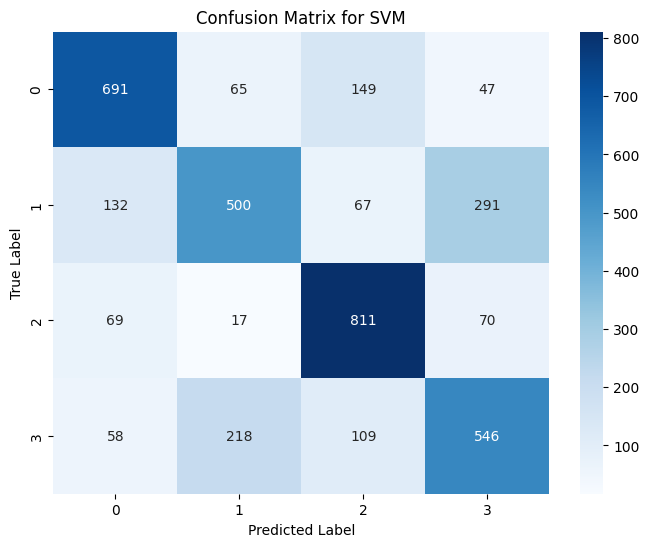


Train-Test Split: 70.0-30.0
Best Params: {'C': 10}
Accuracy: 0.6635416666666667
Precision: 0.6596509789455036
Recall: 0.6640083312773377
F1-Score: 0.6589630657370342
AUC-ROC: 0.6035097301298655
Confusion Matrix: [[691  65 149  47]
 [132 500  67 291]
 [ 69  17 811  70]
 [ 58 218 109 546]]


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, auc
)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
df = pd.read_csv('/content/balanced_dataset.csv')

# Fill missing text columns with an empty string
df.fillna('', inplace=True)

# Lemmatization and stopword removal
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

df['cleaned_statement'] = df['statement'].apply(preprocess_text)

# Handle outliers based on word count (IQR method)
df['word_count'] = df['cleaned_statement'].apply(lambda x: len(x.split()))
Q1 = df['word_count'].quantile(0.25)
Q3 = df['word_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['word_count'] >= lower_bound) & (df['word_count'] <= upper_bound)]
print(f"Dataset size after outlier removal: {df_cleaned.shape[0]}")

# Apply TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=100, ngram_range=(1, 2), min_df=5)  # Use bigrams and min_df to remove rare words
tfidf_matrix = tfidf.fit_transform(df_cleaned['cleaned_statement'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Prepare data for model training
X = tfidf_df  # Features
y = df_cleaned['status']  # Labels

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Binarize the labels for ROC Curve plotting
y_bin = label_binarize(y_resampled, classes=y_resampled.unique())

# Function to plot ROC curve for a multi-class classification problem
def plot_roc_curve(y_test_bin, y_prob, n_classes):
    plt.figure(figsize=(10, 8))
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multi-Class Classification')
    plt.legend(loc='lower right')
    plt.show()

# Function to run experiments with GridSearchCV for hyperparameter tuning
def run_experiment(model, param_grid, model_name):
    results = {}
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')

    for split in [(0.7, 0.3)]:
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=split[1], random_state=42)
        y_train_bin = label_binarize(y_train, classes=y_resampled.unique())
        y_test_bin = label_binarize(y_test, classes=y_resampled.unique())

        # Hyperparameter tuning
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_

        # Train and predict
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        auc_score = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')
        cm = confusion_matrix(y_test, y_pred)

        # Plot ROC curve
        plot_roc_curve(y_test_bin, y_prob, n_classes=y_bin.shape[1])

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        results[split] = {
            'Best Params': grid_search.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC-ROC': auc_score,
            'Confusion Matrix': cm
        }

    return results

# Define models and hyperparameters for tuning
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),
    'Random Forest': (RandomForestClassifier(random_state=42), {'n_estimators': [50, 100, 200]}),
    'SVM': (SVC(kernel='linear', probability=True), {'C': [0.1, 1, 10]})
}

# Run experiments for all models
for name, (model, param_grid) in models.items():
    print(f"\nRunning experiments for {name}...")
    results = run_experiment(model, param_grid, name)

    # Display the results
    for split, metrics in results.items():
        print(f"\nTrain-Test Split: {split[0]*100}-{split[1]*100}")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset size after outlier removal: 11465

Evaluating Logistic Regression...
Average Accuracy: 0.6742
Average Precision: 0.6711
Average Recall: 0.6744
Average F1 Score: 0.6702
Average ROC AUC: 0.5949


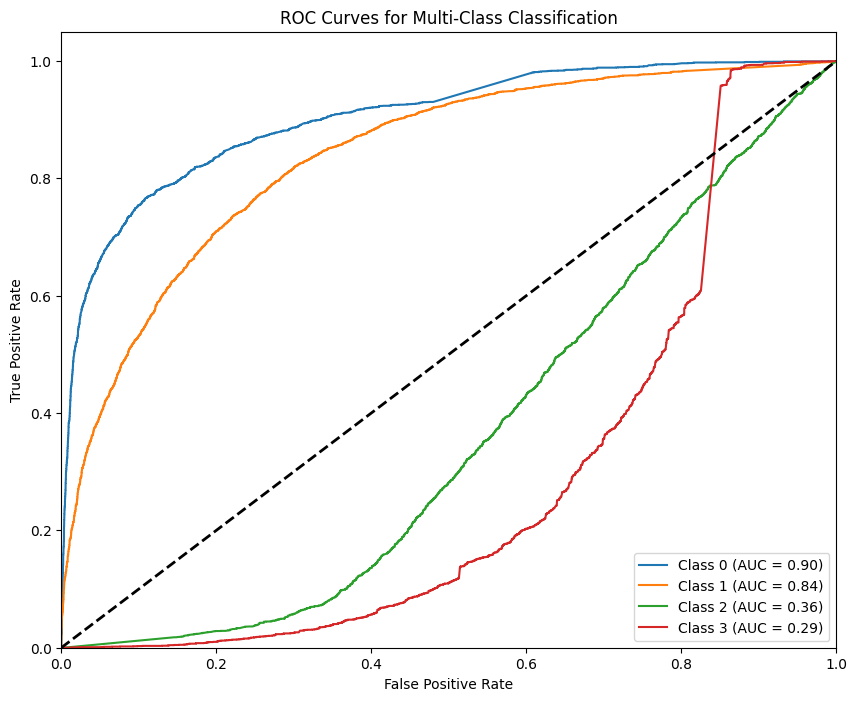

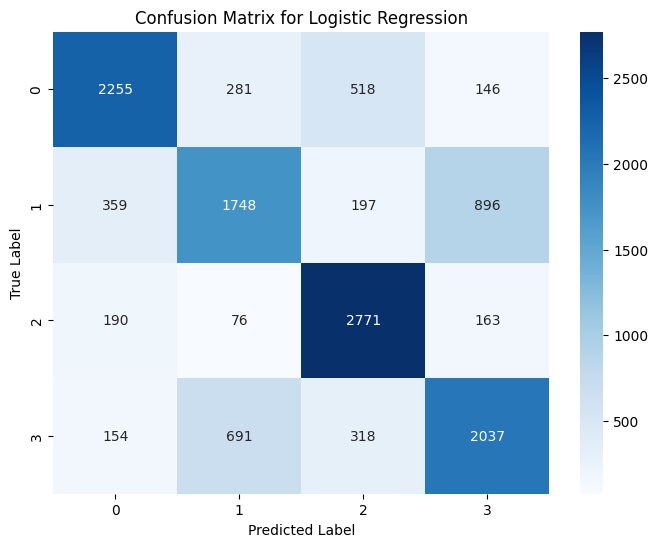


Evaluating Multinomial Naive Bayes...
Average Accuracy: 0.5526
Average Precision: 0.5614
Average Recall: 0.5545
Average F1 Score: 0.5504
Average ROC AUC: 0.6310


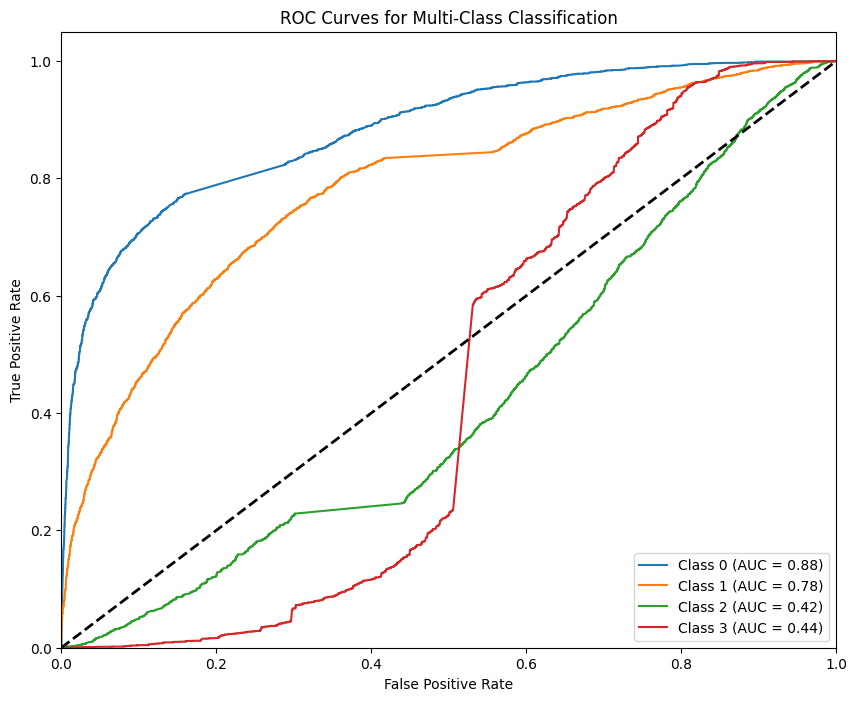

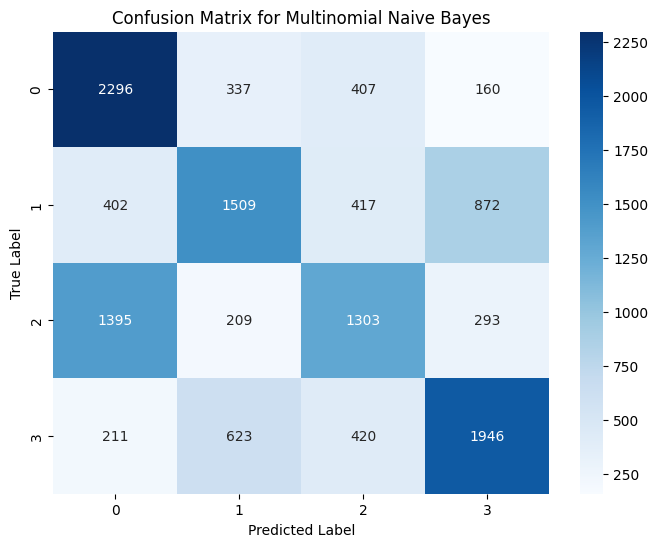


Evaluating Support Vector Machine...
Average Accuracy: 0.7102
Average Precision: 0.7093
Average Recall: 0.7106
Average F1 Score: 0.7069
Average ROC AUC: 0.6010


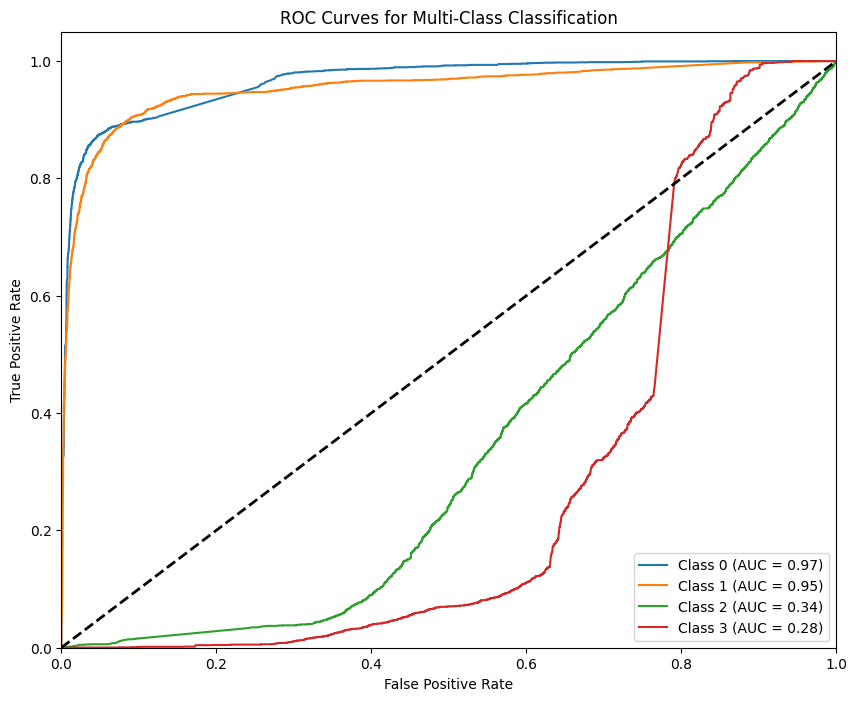

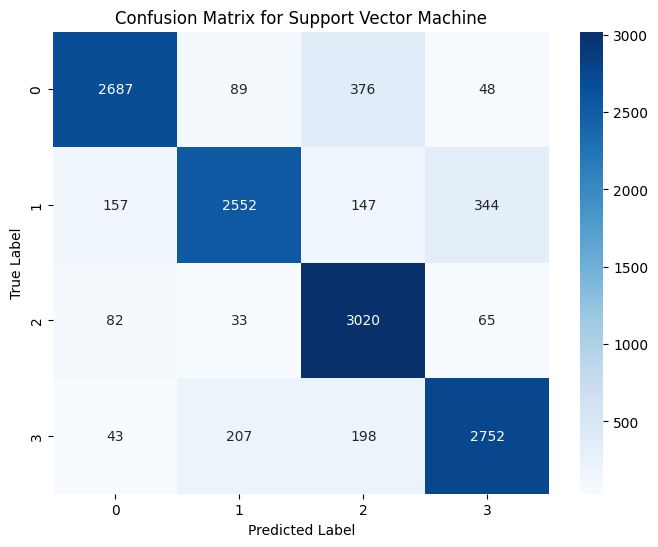

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, auc
)
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import label_binarize
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
df = pd.read_csv('/content/balanced_dataset.csv')

# Fill missing text columns with an empty string
df.fillna('', inplace=True)

# Lemmatization and stopword removal
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

df['cleaned_statement'] = df['statement'].apply(preprocess_text)

# Create additional features
df['word_count'] = df['cleaned_statement'].apply(lambda x: len(x.split()))
df['char_count'] = df['cleaned_statement'].apply(lambda x: len(x))
df['avg_word_length'] = df['char_count'] / df['word_count'].replace(0, 1)

# Handle outliers based on word count (IQR method)
Q1 = df['word_count'].quantile(0.25)
Q3 = df['word_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['word_count'] >= lower_bound) & (df['word_count'] <= upper_bound)]
print(f"Dataset size after outlier removal: {df_cleaned.shape[0]}")

# Apply TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=100, ngram_range=(1, 2), min_df=5)
tfidf_matrix = tfidf.fit_transform(df_cleaned['cleaned_statement'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Prepare data for model training
X = tfidf_df
y = df_cleaned['status']

# Handle class imbalance using Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Binarize the labels for ROC Curve plotting
y_bin = label_binarize(y_resampled, classes=y_resampled.unique())

# Function to plot ROC curve for a multi-class classification problem
def plot_roc_curve(y_test_bin, y_prob, n_classes):
    plt.figure(figsize=(10, 8))
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multi-Class Classification')
    plt.legend(loc='lower right')
    plt.show()

# Function to evaluate models with K-Fold Cross Validation
def evaluate_model(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_aucs = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)

        # Collect metrics
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='macro'))
        recall_scores.append(recall_score(y_test, y_pred, average='macro'))
        f1_scores.append(f1_score(y_test, y_pred, average='macro'))
        roc_aucs.append(roc_auc_score(label_binarize(y_test, classes=y.unique()), y_prob, multi_class='ovr'))

    # Calculate average metrics
    avg_accuracy = np.mean(accuracy_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)
    avg_roc_auc = np.mean(roc_aucs)

    return avg_accuracy, avg_precision, avg_recall, avg_f1, avg_roc_auc

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(probability=True, random_state=42),
}

# Evaluate each model using K-Fold Cross Validation
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    avg_accuracy, avg_precision, avg_recall, avg_f1, avg_roc_auc = evaluate_model(model, X_resampled.values, y_resampled)
    print(f"Average Accuracy: {avg_accuracy:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average F1 Score: {avg_f1:.4f}")
    print(f"Average ROC AUC: {avg_roc_auc:.4f}")

    # Train final model on the full resampled dataset for ROC curve plotting
    model.fit(X_resampled, y_resampled)
    y_prob_final = model.predict_proba(X_resampled)

    # Plot ROC curve
    plot_roc_curve(label_binarize(y_resampled, classes=y_resampled.unique()), y_prob_final, n_classes=y_bin.shape[1])

    # Plot confusion matrix
    y_pred_final = model.predict(X_resampled)
    cm = confusion_matrix(y_resampled, y_pred_final)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, auc
)
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import label_binarize
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
df = pd.read_csv('/content/balanced_dataset.csv')

# Fill missing text columns with an empty string
df.fillna('', inplace=True)

# Lemmatization and stopword removal
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

df['cleaned_statement'] = df['statement'].apply(preprocess_text)

# Create additional features
df['word_count'] = df['cleaned_statement'].apply(lambda x: len(x.split()))
df['char_count'] = df['cleaned_statement'].apply(lambda x: len(x))
df['avg_word_length'] = df['char_count'] / df['word_count'].replace(0, 1)

# Summary Statistics
summary_stats = {
    'Mean Word Count': df['word_count'].mean(),
    'Median Word Count': df['word_count'].median(),
    'Standard Deviation Word Count': df['word_count'].std(),
    '25th Percentile (Q1)': df['word_count'].quantile(0.25),
    '75th Percentile (Q3)': df['word_count'].quantile(0.75),
    'IQR': df['word_count'].quantile(0.75) - df['word_count'].quantile(0.25),
}

print("Summary Statistics:")
for key, value in summary_stats.items():
    print(f"{key}: {value}")

# Handle outliers based on word count (IQR method)
Q1 = df['word_count'].quantile(0.25)
Q3 = df['word_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['word_count'] >= lower_bound) & (df['word_count'] <= upper_bound)]
print(f"Dataset size after outlier removal: {df_cleaned.shape[0]}")

# Apply TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=100, ngram_range=(1, 2), min_df=5)
tfidf_matrix = tfidf.fit_transform(df_cleaned['cleaned_statement'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Prepare data for model training
X = tfidf_df
y = df_cleaned['status']

# Handle class imbalance using Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Binarize the labels for ROC Curve plotting
y_bin = label_binarize(y_resampled, classes=y_resampled.unique())

# Function to plot ROC curve for a multi-class classification problem
def plot_roc_curve(y_test_bin, y_prob, n_classes):
    plt.figure(figsize=(10, 8))
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multi-Class Classification')
    plt.legend(loc='lower right')
    plt.show()

# Function to evaluate models with K-Fold Cross Validation
def evaluate_model(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_aucs = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)

        # Collect metrics
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='macro'))
        recall_scores.append(recall_score(y_test, y_pred, average='macro'))
        f1_scores.append(f1_score(y_test, y_pred, average='macro'))
        roc_aucs.append(roc_auc_score(label_binarize(y_test, classes=y.unique()), y_prob, multi_class='ovr'))

    # Calculate average metrics
    avg_accuracy = np.mean(accuracy_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)
    avg_roc_auc = np.mean(roc_aucs)

    return avg_accuracy, avg_precision, avg_recall, avg_f1, avg_roc_auc

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
}

# Evaluate each model using K-Fold Cross Validation
results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    avg_accuracy, avg_precision, avg_recall, avg_f1, avg_roc_auc = evaluate_model(model, X_resampled.values, y_resampled)
    results[name] = {
        'Average Accuracy': avg_accuracy,
        'Average Precision': avg_precision,
        'Average Recall': avg_recall,
        'Average F1 Score': avg_f1,
        'Average ROC AUC': avg_roc_auc
    }
    print(f"Average Accuracy: {avg_accuracy:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average F1 Score: {avg_f1:.4f}")
    print(f"Average ROC AUC: {avg_roc_auc:.4f}")

# Ensemble Learning with Voting Classifier
voting_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('nb', MultinomialNB()),
    ('svm', SVC(probability=True, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
], voting='soft')

# Evaluate the Voting Classifier using K-Fold Cross Validation
print("\nEvaluating Ensemble Learning with Voting Classifier...")
avg_accuracy, avg_precision, avg_recall, avg_f1, avg_roc_auc = evaluate_model(voting_model, X_resampled.values, y_resampled)
results['Voting Classifier'] = {
    'Average Accuracy': avg_accuracy,
    'Average Precision': avg_precision,
    'Average Recall': avg_recall,
    'Average F1 Score': avg_f1,
    'Average ROC AUC': avg_roc_auc
}

print(f"\nVoting Classifier Average Accuracy: {avg_accuracy:.4f}")
print(f"Voting Classifier Average Precision: {avg_precision:.4f}")
print(f"Voting Classifier Average Recall: {avg_recall:.4f}")
print(f"Voting Classifier Average F1 Score: {avg_f1:.4f}")
print(f"Voting Classifier Average ROC AUC: {avg_roc_auc:.4f}")

# Display results
for model_name, metrics in results.items():
    print(f"\nResults for {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Summary Statistics:
Mean Word Count: 51.820901639344264
Median Word Count: 29.0
Standard Deviation Word Count: 70.00439698466687
25th Percentile (Q1): 8.0
75th Percentile (Q3): 69.0
IQR: 61.0
Dataset size after outlier removal: 11465

Evaluating Logistic Regression...
Average Accuracy: 0.6742
Average Precision: 0.6711
Average Recall: 0.6744
Average F1 Score: 0.6702
Average ROC AUC: 0.5949

Evaluating Multinomial Naive Bayes...
Average Accuracy: 0.5526
Average Precision: 0.5614
Average Recall: 0.5545
Average F1 Score: 0.5504
Average ROC AUC: 0.6310

Evaluating Support Vector Machine...
Average Accuracy: 0.7102
Average Precision: 0.7093
Average Recall: 0.7106
Average F1 Score: 0.7069
Average ROC AUC: 0.6010

Evaluating Random Forest...
Average Accuracy: 0.7211
Average Precision: 0.7201
Average Recall: 0.7214
Average F1 Score: 0.7187
Average ROC AUC: 0.5905

Evaluating Ensemble Learning with Voting Classifier...

Voting Classifier Average Accuracy: 0.7216
Voting Classifier Average Precisi